**SINGLE LINEAR REGRESSION**

SIMPLE LINEAR REGRESSION (SLR)
Complete Implementation Framework

[STEP 1] DATA LOADING
----------------------------------------------------------------------
UPLOAD DATASET
Silakan pilih file CSV Anda...


Saving demand_forecasting_dataset .csv to demand_forecasting_dataset  (3).csv

✓ File 'demand_forecasting_dataset  (3).csv' berhasil diupload!
INFORMASI DATASET
Jumlah baris (rows):    4921
Jumlah kolom (columns): 10
Ukuran dataset:         (4921, 10)

PREVIEW DATA (5 Baris Pertama)
         date  product_id  category_id  store_id  historical_sales  price  \
0  2022-01-02        1043            4         9                16  48.29   
1  2022-01-02        1012            4         2                25  44.01   
2  2022-01-03        1003            5         4                26   9.44   
3  2022-01-03        1005            4         1                23   5.42   
4  2022-01-04        1011            1         5                12  21.86   

   promotion_flag  holiday_flag  economic_index  target_demand  
0               0             0           84.07              8  
1               0             0          106.87             22  
2               1             0          104.98           

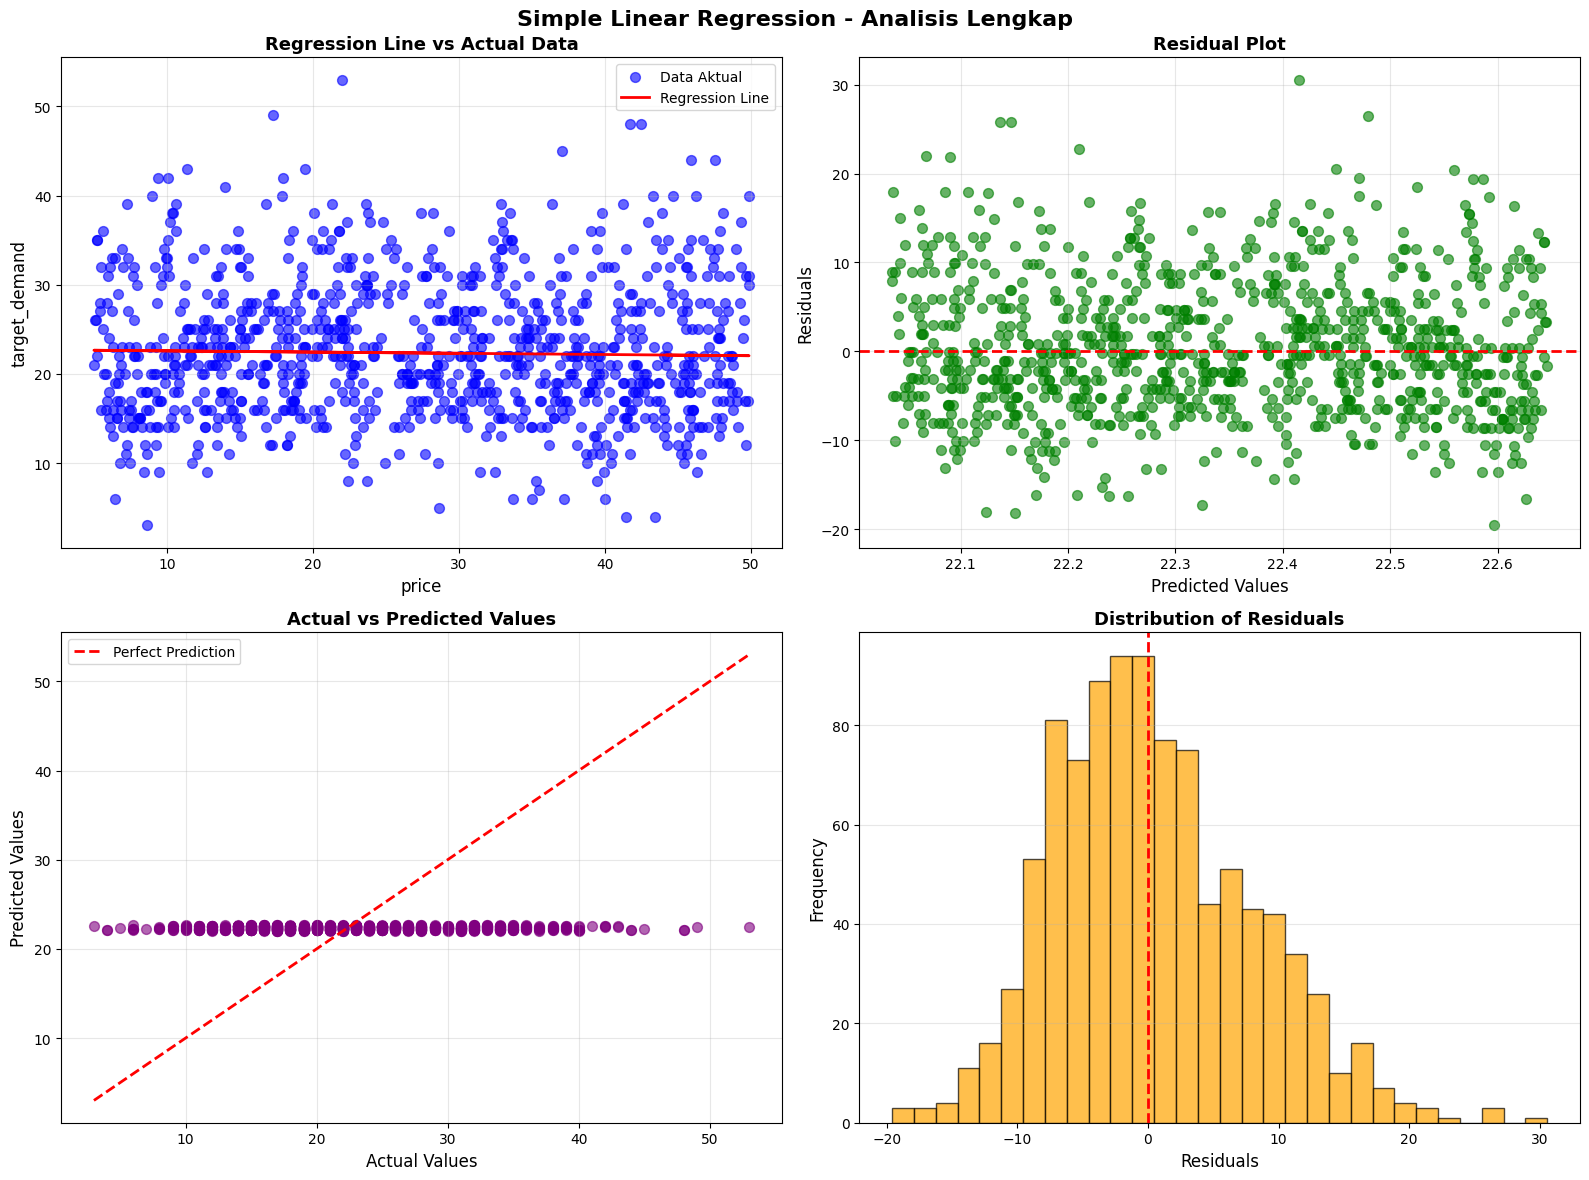


✓ Visualisasi completed!

[STEP 10] CHECKING ASSUMPTIONS
----------------------------------------------------------------------
Check regression assumptions? (y/n) [default: y]: y

CHECKING LINEAR REGRESSION ASSUMPTIONS

1️⃣  LINEARITY CHECK
  Correlation coefficient: -0.0129
  ❌ Weak linear relationship

2️⃣  NORMALITY OF RESIDUALS (Shapiro-Wilk Test)
  Test statistic: 0.9842
  P-value: 0.0000
  ❌ Residuals are NOT normally distributed (p < 0.05)

3️⃣  HOMOSCEDASTICITY CHECK
  Check residual plot - residuals should be randomly scattered
  Standard deviation of residuals: 7.5515

4️⃣  INDEPENDENCE CHECK
  Durbin-Watson test result:
  (Values close to 2 indicate no autocorrelation)

[STEP 11] PREDICTION FOR NEW DATA (OPTIONAL)
----------------------------------------------------------------------
Prediksi data baru? (y/n) [default: n]: n

[STEP 12] MODEL SUMMARY
----------------------------------------------------------------------

MODEL SUMMARY STATISTICS

📋 Model Information:
  - Mo

In [ ]:
"""
Simple Linear Regression (SLR) - Complete Implementation
Based on Module 4a Framework - Advanced Logistics Data Analytics
"""

# ===============================================
# 1. IMPORT LIBRARIES
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ===============================================
# 2. DATA PREPARATION & PREPROCESSING
# ===============================================

class SLRFramework:
    """
    Complete Simple Linear Regression Framework Implementation
    """

    def __init__(self, data=None, target_column=None, feature_column=None):
        """
        Initialize SLR Framework

        Parameters:
        -----------
        data : DataFrame
            Input dataset
        target_column : str
            Name of target column (dependent variable Y)
        feature_column : str
            Name of feature column (independent variable X)
        """
        self.data = None
        self.target_column = target_column
        self.feature_column = feature_column
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.y_pred = None

    def upload_and_load_data(self):
        """
        Upload CSV file from Google Colab and load dataset
        """
        from google.colab import files
        import io

        # Upload file
        print("=" * 70)
        print("UPLOAD DATASET")
        print("=" * 70)
        print("Silakan pilih file CSV Anda...")
        uploaded = files.upload()

        # Read uploaded file
        file_name = list(uploaded.keys())[0]
        self.data = pd.read_csv(io.BytesIO(uploaded[file_name]))

        # Dataset information
        print(f"\n✓ File '{file_name}' berhasil diupload!")
        print("=" * 70)
        print("INFORMASI DATASET")
        print("=" * 70)
        print(f"Jumlah baris (rows):    {len(self.data)}")
        print(f"Jumlah kolom (columns): {len(self.data.columns)}")
        print(f"Ukuran dataset:         {self.data.shape}")

        # Display first 5 rows
        print("\n" + "=" * 70)
        print("PREVIEW DATA (5 Baris Pertama)")
        print("=" * 70)
        print(self.data.head())

        # Data types info
        print("\n" + "=" * 70)
        print("TIPE DATA KOLOM")
        print("=" * 70)
        print(self.data.dtypes)

        # Check missing values
        print("\n" + "=" * 70)
        print("MISSING VALUES CHECK")
        print("=" * 70)
        missing = self.data.isnull().sum()
        if missing.sum() == 0:
            print("✓ Tidak ada missing values!")
        else:
            print("Missing values per kolom:")
            print(missing[missing > 0])
            print(f"\nTotal missing values: {missing.sum()}")

        # Statistical summary
        print("\n" + "=" * 70)
        print("STATISTIK DESKRIPTIF")
        print("=" * 70)
        print(self.data.describe())

        return self.data

    def select_columns(self):
        """
        Interactive column selection for Feature (X) and Target (Y)
        """
        print("\n" + "=" * 70)
        print("PILIH KOLOM UNTUK SIMPLE LINEAR REGRESSION")
        print("=" * 70)
        print("Simple Linear Regression: Y = β₀ + β₁X")
        print("  - Feature (X): Independent Variable (1 kolom)")
        print("  - Target (Y):  Dependent Variable (1 kolom)")

        print("\nKolom yang tersedia:")
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        for i, col in enumerate(numeric_cols, 1):
            dtype = self.data[col].dtype
            print(f"  {i}. {col:<30} [{dtype}]")

        # Select Feature Column (X)
        print("\n" + "-" * 70)
        print("PILIH FEATURE COLUMN (X - Independent Variable)")
        print("-" * 70)
        while True:
            feature_input = input("Masukkan nomor atau nama feature column: ").strip()

            if feature_input.isdigit():
                index = int(feature_input) - 1
                if 0 <= index < len(numeric_cols):
                    self.feature_column = numeric_cols[index]
                    print(f"✓ Feature column dipilih: '{self.feature_column}' (kolom #{feature_input})")
                    break
                else:
                    print(f"❌ Nomor {feature_input} tidak valid! Pilih antara 1-{len(numeric_cols)}")
            elif feature_input in numeric_cols:
                self.feature_column = feature_input
                col_number = list(numeric_cols).index(feature_input) + 1
                print(f"✓ Feature column dipilih: '{self.feature_column}' (kolom #{col_number})")
                break
            else:
                print(f"❌ Input '{feature_input}' tidak ditemukan!")

        # Select Target Column (Y)
        print("\n" + "-" * 70)
        print("PILIH TARGET COLUMN (Y - Dependent Variable)")
        print("-" * 70)
        while True:
            target_input = input("Masukkan nomor atau nama target column: ").strip()

            if target_input.isdigit():
                index = int(target_input) - 1
                if 0 <= index < len(numeric_cols):
                    self.target_column = numeric_cols[index]
                    if self.target_column == self.feature_column:
                        print(f"❌ Error: Target tidak boleh sama dengan Feature!")
                        continue
                    print(f"✓ Target column dipilih: '{self.target_column}' (kolom #{target_input})")
                    break
                else:
                    print(f"❌ Nomor {target_input} tidak valid! Pilih antara 1-{len(numeric_cols)}")
            elif target_input in numeric_cols:
                self.target_column = target_input
                if self.target_column == self.feature_column:
                    print(f"❌ Error: Target tidak boleh sama dengan Feature!")
                    continue
                col_number = list(numeric_cols).index(target_input) + 1
                print(f"✓ Target column dipilih: '{self.target_column}' (kolom #{col_number})")
                break
            else:
                print(f"❌ Input '{target_input}' tidak ditemukan!")

        # Summary
        print("\n" + "=" * 70)
        print("SUMMARY COLUMN SELECTION")
        print("=" * 70)
        print(f"Feature (X): {self.feature_column}")
        print(f"Target (Y):  {self.target_column}")
        print(f"\nModel: {self.target_column} = β₀ + β₁ × {self.feature_column}")

        return self.feature_column, self.target_column

    def handle_missing_values(self, strategy='drop'):
        """
        Handle missing values in dataset

        Parameters:
        -----------
        strategy : str
            'drop', 'mean', 'median'
        """
        # Work only with selected columns
        df_work = self.data[[self.feature_column, self.target_column]].copy()

        missing_before = df_work.isnull().sum().sum()

        if missing_before == 0:
            print("✓ No missing values found")
            self.data = df_work
            return

        print(f"\n📊 Missing values sebelum: {missing_before}")

        if strategy == 'drop':
            df_work = df_work.dropna()
            print("✓ Strategy: Drop rows dengan missing values")
        elif strategy == 'mean':
            df_work = df_work.fillna(df_work.mean())
            print("✓ Strategy: Fill dengan mean")
        elif strategy == 'median':
            df_work = df_work.fillna(df_work.median())
            print("✓ Strategy: Fill dengan median")

        missing_after = df_work.isnull().sum().sum()
        rows_removed = len(self.data) - len(df_work)

        print(f"📊 Missing values sesudah: {missing_after}")
        print(f"📊 Rows removed: {rows_removed}")
        print(f"✓ Dataset shape: {df_work.shape}")

        self.data = df_work

    def handle_outliers(self, method='zscore', threshold=3):
        """
        Handle outliers in dataset

        Parameters:
        -----------
        method : str
            'zscore' or 'iqr'
        threshold : float
            Z-score threshold (default: 3)
        """
        df_work = self.data.copy()
        rows_before = len(df_work)

        print(f"\n📊 Rows sebelum outlier removal: {rows_before}")

        if method == 'zscore':
            print(f"✓ Method: Z-score (threshold: {threshold})")
            z_scores = np.abs(stats.zscore(df_work))
            df_work = df_work[(z_scores < threshold).all(axis=1)]

        elif method == 'iqr':
            print("✓ Method: IQR (Interquartile Range)")
            Q1 = df_work.quantile(0.25)
            Q3 = df_work.quantile(0.75)
            IQR = Q3 - Q1
            df_work = df_work[~((df_work < (Q1 - 1.5 * IQR)) |
                               (df_work > (Q3 + 1.5 * IQR))).any(axis=1)]

        rows_after = len(df_work)
        outliers_removed = rows_before - rows_after

        print(f"📊 Rows sesudah outlier removal: {rows_after}")
        print(f"📊 Outliers removed: {outliers_removed}")
        print(f"✓ Dataset shape: {df_work.shape}")

        self.data = df_work

    def prepare_data(self):
        """
        Prepare X and y arrays for training
        """
        self.X = self.data[[self.feature_column]].values
        self.y = self.data[self.target_column].values

        print("\n" + "=" * 70)
        print("DATA PREPARATION")
        print("=" * 70)
        print(f"✓ X shape: {self.X.shape}")
        print(f"✓ y shape: {self.y.shape}")

        return self.X, self.y

    def split_data(self, test_size=0.2, random_state=42):
        """
        Split data into training and test sets

        Parameters:
        -----------
        test_size : float
            Proportion of test set (default: 0.2)
        random_state : int
            Random seed for reproducibility
        """
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )

        print(f"✓ Data split completed:")
        print(f"  - Training set: {self.X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)")
        print(f"  - Test set:     {self.X_test.shape[0]} samples ({test_size*100:.0f}%)")

        return self.X_train, self.X_test, self.y_train, self.y_test

    # ===============================================
    # 3. MODEL TRAINING & PREDICTION
    # ===============================================

    def train_model(self):
        """
        Train Simple Linear Regression model
        """
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        print("\n" + "=" * 70)
        print("MODEL TRAINING COMPLETED")
        print("=" * 70)
        print(f"✓ Model: Simple Linear Regression")
        print(f"\n📐 Model Parameters:")
        print(f"  - Intercept (β₀): {self.model.intercept_:.6f}")
        print(f"  - Coefficient (β₁): {self.model.coef_[0]:.6f}")
        print(f"\n📝 Regression Equation:")
        print(f"  {self.target_column} = {self.model.intercept_:.6f} + {self.model.coef_[0]:.6f} × {self.feature_column}")

        return self.model

    def predict_and_evaluate(self):
        """
        Make predictions and evaluate model performance
        """
        # Predictions
        y_pred_train = self.model.predict(self.X_train)
        self.y_pred = self.model.predict(self.X_test)

        # Training metrics
        train_mse = mean_squared_error(self.y_train, y_pred_train)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(self.y_train, y_pred_train)
        train_r2 = r2_score(self.y_train, y_pred_train)

        # Test metrics
        test_mse = mean_squared_error(self.y_test, self.y_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(self.y_test, self.y_pred)
        test_r2 = r2_score(self.y_test, self.y_pred)

        print("\n" + "=" * 70)
        print("MODEL PERFORMANCE EVALUATION")
        print("=" * 70)

        print("\n📊 TRAINING SET METRICS:")
        print(f"  - MSE (Mean Squared Error):       {train_mse:.6f}")
        print(f"  - RMSE (Root Mean Squared Error): {train_rmse:.6f}")
        print(f"  - MAE (Mean Absolute Error):      {train_mae:.6f}")
        print(f"  - R² Score:                       {train_r2:.6f}")

        print("\n📊 TEST SET METRICS:")
        print(f"  - MSE (Mean Squared Error):       {test_mse:.6f}")
        print(f"  - RMSE (Root Mean Squared Error): {test_rmse:.6f}")
        print(f"  - MAE (Mean Absolute Error):      {test_mae:.6f}")
        print(f"  - R² Score:                       {test_r2:.6f}")

        # Interpretation
        print("\n📈 R² SCORE INTERPRETATION:")
        if test_r2 >= 0.9:
            print("  ✓ Excellent! Model sangat baik (≥90%)")
        elif test_r2 >= 0.7:
            print("  ✓ Good! Model cukup baik (70-89%)")
        elif test_r2 >= 0.5:
            print("  ⚠ Moderate. Model cukup (50-69%)")
        else:
            print("  ❌ Poor. Model kurang baik (<50%)")

        # Check overfitting
        if train_r2 - test_r2 > 0.1:
            print("\n⚠️  Warning: Possible overfitting detected!")
            print(f"  Training R² ({train_r2:.4f}) >> Test R² ({test_r2:.4f})")

        return self.y_pred, train_r2, test_r2

    # ===============================================
    # 4. MODEL EVALUATION & VISUALIZATION
    # ===============================================

    def visualize_results(self):
        """
        Comprehensive visualization of regression results
        """
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Simple Linear Regression - Analisis Lengkap',
                     fontsize=16, fontweight='bold')

        # 1. Scatter plot with regression line
        axes[0, 0].scatter(self.X_test, self.y_test, alpha=0.6,
                          label='Data Aktual', color='blue', s=50)
        axes[0, 0].plot(self.X_test, self.y_pred, color='red',
                       linewidth=2, label='Regression Line')
        axes[0, 0].set_xlabel(self.feature_column, fontsize=12)
        axes[0, 0].set_ylabel(self.target_column, fontsize=12)
        axes[0, 0].set_title('Regression Line vs Actual Data', fontsize=13, fontweight='bold')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)

        # 2. Residual plot
        residuals = self.y_test - self.y_pred
        axes[0, 1].scatter(self.y_pred, residuals, alpha=0.6, color='green', s=50)
        axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
        axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
        axes[0, 1].set_ylabel('Residuals', fontsize=12)
        axes[0, 1].set_title('Residual Plot', fontsize=13, fontweight='bold')
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Actual vs Predicted
        axes[1, 0].scatter(self.y_test, self.y_pred, alpha=0.6, color='purple', s=50)
        min_val = min(self.y_test.min(), self.y_pred.min())
        max_val = max(self.y_test.max(), self.y_pred.max())
        axes[1, 0].plot([min_val, max_val], [min_val, max_val],
                       'r--', linewidth=2, label='Perfect Prediction')
        axes[1, 0].set_xlabel('Actual Values', fontsize=12)
        axes[1, 0].set_ylabel('Predicted Values', fontsize=12)
        axes[1, 0].set_title('Actual vs Predicted Values', fontsize=13, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        # 4. Distribution of residuals
        axes[1, 1].hist(residuals, bins=30, color='orange',
                       edgecolor='black', alpha=0.7)
        axes[1, 1].set_xlabel('Residuals', fontsize=12)
        axes[1, 1].set_ylabel('Frequency', fontsize=12)
        axes[1, 1].set_title('Distribution of Residuals', fontsize=13, fontweight='bold')
        axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
        axes[1, 1].grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.show()

        print("\n✓ Visualisasi completed!")

    def check_assumptions(self):
        """
        Check Linear Regression Assumptions
        """
        residuals = self.y_test - self.y_pred

        print("\n" + "=" * 70)
        print("CHECKING LINEAR REGRESSION ASSUMPTIONS")
        print("=" * 70)

        # 1. Linearity
        print("\n1️⃣  LINEARITY CHECK")
        correlation = np.corrcoef(self.X_test.flatten(), self.y_test)[0, 1]
        print(f"  Correlation coefficient: {correlation:.4f}")
        if abs(correlation) > 0.7:
            print("  ✓ Strong linear relationship")
        elif abs(correlation) > 0.5:
            print("  ⚠ Moderate linear relationship")
        else:
            print("  ❌ Weak linear relationship")

        # 2. Normality of Residuals
        print("\n2️⃣  NORMALITY OF RESIDUALS (Shapiro-Wilk Test)")
        if len(residuals) <= 5000:
            stat, p_value = stats.shapiro(residuals)
            print(f"  Test statistic: {stat:.4f}")
            print(f"  P-value: {p_value:.4f}")
            if p_value > 0.05:
                print("  ✓ Residuals are normally distributed (p > 0.05)")
            else:
                print("  ❌ Residuals are NOT normally distributed (p < 0.05)")
        else:
            print("  ⚠ Dataset too large for Shapiro-Wilk test")

        # 3. Homoscedasticity
        print("\n3️⃣  HOMOSCEDASTICITY CHECK")
        print("  Check residual plot - residuals should be randomly scattered")
        residual_std = np.std(residuals)
        print(f"  Standard deviation of residuals: {residual_std:.4f}")

        # 4. Independence
        print("\n4️⃣  INDEPENDENCE CHECK")
        print("  Durbin-Watson test result:")
        print("  (Values close to 2 indicate no autocorrelation)")

        return residuals

    def predict_new_data(self):
        """
        Interactive prediction for new data
        """
        print("\n" + "=" * 70)
        print("PREDICT NEW DATA")
        print("=" * 70)

        try:
            new_values = input(f"Masukkan nilai {self.feature_column} (pisahkan dengan koma): ").strip()
            X_new = [float(x.strip()) for x in new_values.split(',')]
            X_new_array = np.array(X_new).reshape(-1, 1)
            predictions = self.model.predict(X_new_array)

            print("\n📊 HASIL PREDIKSI:")
            print("-" * 70)
            for i, (x, pred) in enumerate(zip(X_new, predictions), 1):
                print(f"  {i}. {self.feature_column} = {x:.2f}  →  Prediksi {self.target_column} = {pred:.4f}")

            return predictions

        except Exception as e:
            print(f"❌ Error: {str(e)}")
            return None

    def summary_statistics(self):
        """
        Display summary statistics of the model
        """
        print("\n" + "=" * 70)
        print("MODEL SUMMARY STATISTICS")
        print("=" * 70)

        # Model info
        print(f"\n📋 Model Information:")
        print(f"  - Model Type: Simple Linear Regression")
        print(f"  - Feature (X): {self.feature_column}")
        print(f"  - Target (Y): {self.target_column}")

        # Data info
        print(f"\n📊 Dataset Information:")
        print(f"  - Total samples: {len(self.data)}")
        print(f"  - Training samples: {len(self.X_train)}")
        print(f"  - Testing samples: {len(self.X_test)}")

        # Parameters
        print(f"\n📐 Model Parameters:")
        print(f"  - Intercept (β₀): {self.model.intercept_:.6f}")
        print(f"  - Coefficient (β₁): {self.model.coef_[0]:.6f}")

        # Performance
        test_r2 = r2_score(self.y_test, self.y_pred)
        test_rmse = np.sqrt(mean_squared_error(self.y_test, self.y_pred))

        print(f"\n📈 Model Performance:")
        print(f"  - R² Score: {test_r2:.6f}")
        print(f"  - RMSE: {test_rmse:.6f}")

# ===============================================
# 5. MAIN EXECUTION FUNCTION
# ===============================================

def main():
    """
    Main execution function - Complete Simple Linear Regression Pipeline
    """
    print("=" * 70)
    print("SIMPLE LINEAR REGRESSION (SLR)")
    print("Complete Implementation Framework")
    print("=" * 70)

    # Initialize framework
    slr_fw = SLRFramework()

    # Step 1: Upload and load data
    print("\n[STEP 1] DATA LOADING")
    print("-" * 70)
    slr_fw.upload_and_load_data()

    # Step 2: Select columns
    print("\n[STEP 2] COLUMN SELECTION")
    print("-" * 70)
    slr_fw.select_columns()

    # Step 3: Handle missing values
    print("\n[STEP 3] HANDLING MISSING VALUES")
    print("-" * 70)
    missing_strategy = input("Pilih strategi (drop/mean/median) [default: drop]: ").strip().lower()
    if missing_strategy == "":
        missing_strategy = "drop"
    slr_fw.handle_missing_values(strategy=missing_strategy)

    # Step 4: Handle outliers
    print("\n[STEP 4] OUTLIER HANDLING")
    print("-" * 70)
    handle_out = input("Handle outliers? (y/n) [default: n]: ").strip().lower()
    if handle_out == "y":
        outlier_method = input("Metode outlier (zscore/iqr) [default: zscore]: ").strip().lower()
        if outlier_method == "":
            outlier_method = "zscore"
        slr_fw.handle_outliers(method=outlier_method)
    else:
        print("✓ Skipping outlier handling")

    # Step 5: Prepare data
    print("\n[STEP 5] DATA PREPARATION")
    print("-" * 70)
    slr_fw.prepare_data()

    # Step 6: Split data
    print("\n[STEP 6] TRAIN-TEST SPLIT")
    print("-" * 70)
    test_size = input("Ukuran test set (0.1-0.5) [default: 0.2]: ").strip()
    test_size = float(test_size) if test_size else 0.2
    slr_fw.split_data(test_size=test_size, random_state=42)

    # Step 7: Train model
    print("\n[STEP 7] TRAINING MODEL")
    print("-" * 70)
    slr_fw.train_model()

    # Step 8: Predict and evaluate
    print("\n[STEP 8] PREDICTION & EVALUATION")
    print("-" * 70)
    y_pred, train_r2, test_r2 = slr_fw.predict_and_evaluate()

    # Step 9: Visualize results
    print("\n[STEP 9] VISUALIZATION")
    print("-" * 70)
    do_viz = input("Tampilkan visualisasi? (y/n) [default: y]: ").strip().lower()
    if do_viz == "" or do_viz == "y":
        slr_fw.visualize_results()

    # Step 10: Check assumptions
    print("\n[STEP 10] CHECKING ASSUMPTIONS")
    print("-" * 70)
    do_check = input("Check regression assumptions? (y/n) [default: y]: ").strip().lower()
    if do_check == "" or do_check == "y":
        slr_fw.check_assumptions()

    # Step 11: Predict new data (optional)
    print("\n[STEP 11] PREDICTION FOR NEW DATA (OPTIONAL)")
    print("-" * 70)
    do_predict = input("Prediksi data baru? (y/n) [default: n]: ").strip().lower()
    if do_predict == "y":
        slr_fw.predict_new_data()

    # Step 12: Summary
    print("\n[STEP 12] MODEL SUMMARY")
    print("-" * 70)
    slr_fw.summary_statistics()

    # Final summary
    print("\n" + "=" * 70)
    print("✓ SIMPLE LINEAR REGRESSION PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 70)
    print(f"\n📊 HASIL AKHIR:")
    print(f"  - Feature Column:     {slr_fw.feature_column}")
    print(f"  - Target Column:      {slr_fw.target_column}")
    print(f"  - Intercept (β₀):     {slr_fw.model.intercept_:.6f}")
    print(f"  - Coefficient (β₁):   {slr_fw.model.coef_[0]:.6f}")
    print(f"  - Training R² Score:  {train_r2:.6f}")
    print(f"  - Test R² Score:      {test_r2:.6f}")
    print(f"  - Total Predictions:  {len(y_pred)}")
    print(f"\n📝 Regression Equation:")
    print(f"  {slr_fw.target_column} = {slr_fw.model.intercept_:.6f} + {slr_fw.model.coef_[0]:.6f} × {slr_fw.feature_column}")

# ===============================================
# RUN THE COMPLETE PIPELINE
# ===============================================
if __name__ == "__main__":
    main()

**MULTIPLE LINEAR REGRESSION**

MULTIPLE LINEAR REGRESSION (MLR)
Streamlined & Debugged Version

[1] DATA LOADING
UPLOAD DATASET


Saving demand_forecasting_dataset .csv to demand_forecasting_dataset  (2).csv

✓ File 'demand_forecasting_dataset  (2).csv' loaded successfully!
  Shape: (4921, 10)

First 5 rows:
         date  product_id  category_id  store_id  historical_sales  price  \
0  2022-01-02        1043            4         9                16  48.29   
1  2022-01-02        1012            4         2                25  44.01   
2  2022-01-03        1003            5         4                26   9.44   
3  2022-01-03        1005            4         1                23   5.42   
4  2022-01-04        1011            1         5                12  21.86   

   promotion_flag  holiday_flag  economic_index  target_demand  
0               0             0           84.07              8  
1               0             0          106.87             22  
2               1             0          104.98             29  
3               1             1           92.75             22  
4               1             1 

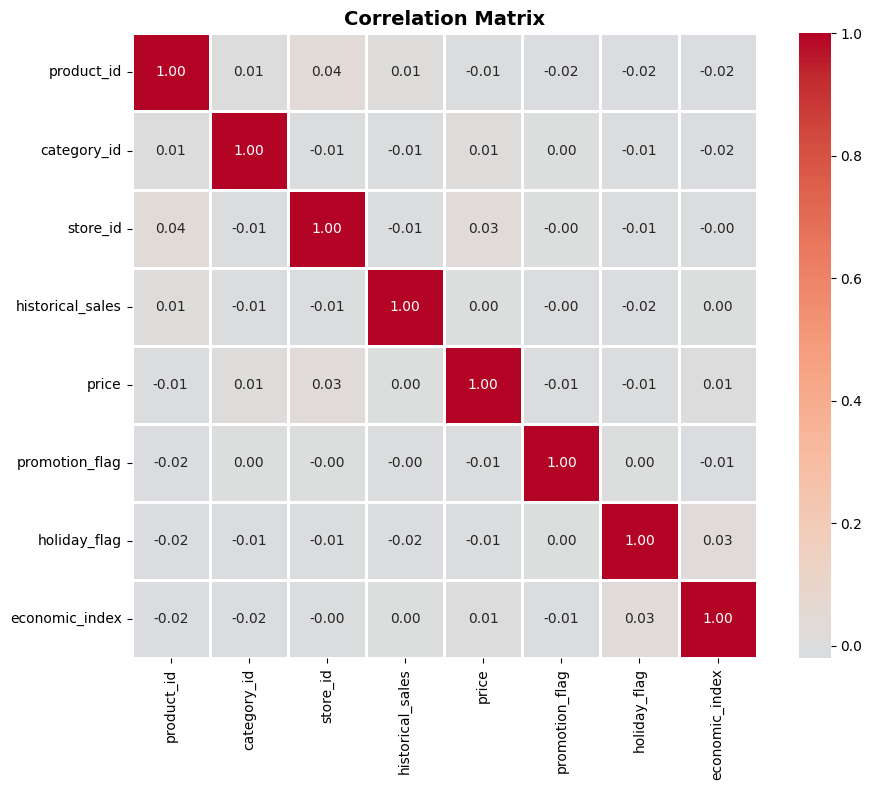


⚠️ High Correlations (|r| > 0.8):
  ✓ None detected

📊 VIF Values:
         Feature        VIF
      product_id 134.102666
     category_id   5.502231
        store_id   4.588551
historical_sales  21.721289
           price   5.432774
  promotion_flag   1.411316
    holiday_flag   1.181223
  economic_index 100.980216

💡 VIF > 10 indicates high multicollinearity

[6] NORMALIZATION
Normalize? (y/n) [n]: n

[7] DATA PREPARATION

✓ Data prepared:
  X shape: (4921, 8)
  y shape: (4921,)

[8] TRAIN-TEST SPLIT
Test size [0.2]: 0.2
✓ Train: 3936 | Test: 985

[9] TRAINING

MODEL TRAINED
Intercept (β₀): -7.8863

Coefficients:
  product_id: 0.0069
  category_id: -0.0282
  store_id: -0.0049
  historical_sales: 0.9954
  price: -0.0086
  promotion_flag: 9.9188
  holiday_flag: 0.0178
  economic_index: 0.0066

[10] EVALUATION

MODEL EVALUATION
Train R²:      0.7027
Test R²:       0.6944
Adjusted R²:   0.6919
RMSE:          4.1749
MAE:           3.3590

⚠️ Moderate model (R² ≥ 0.5)

[11] CROSS-VALIDAT

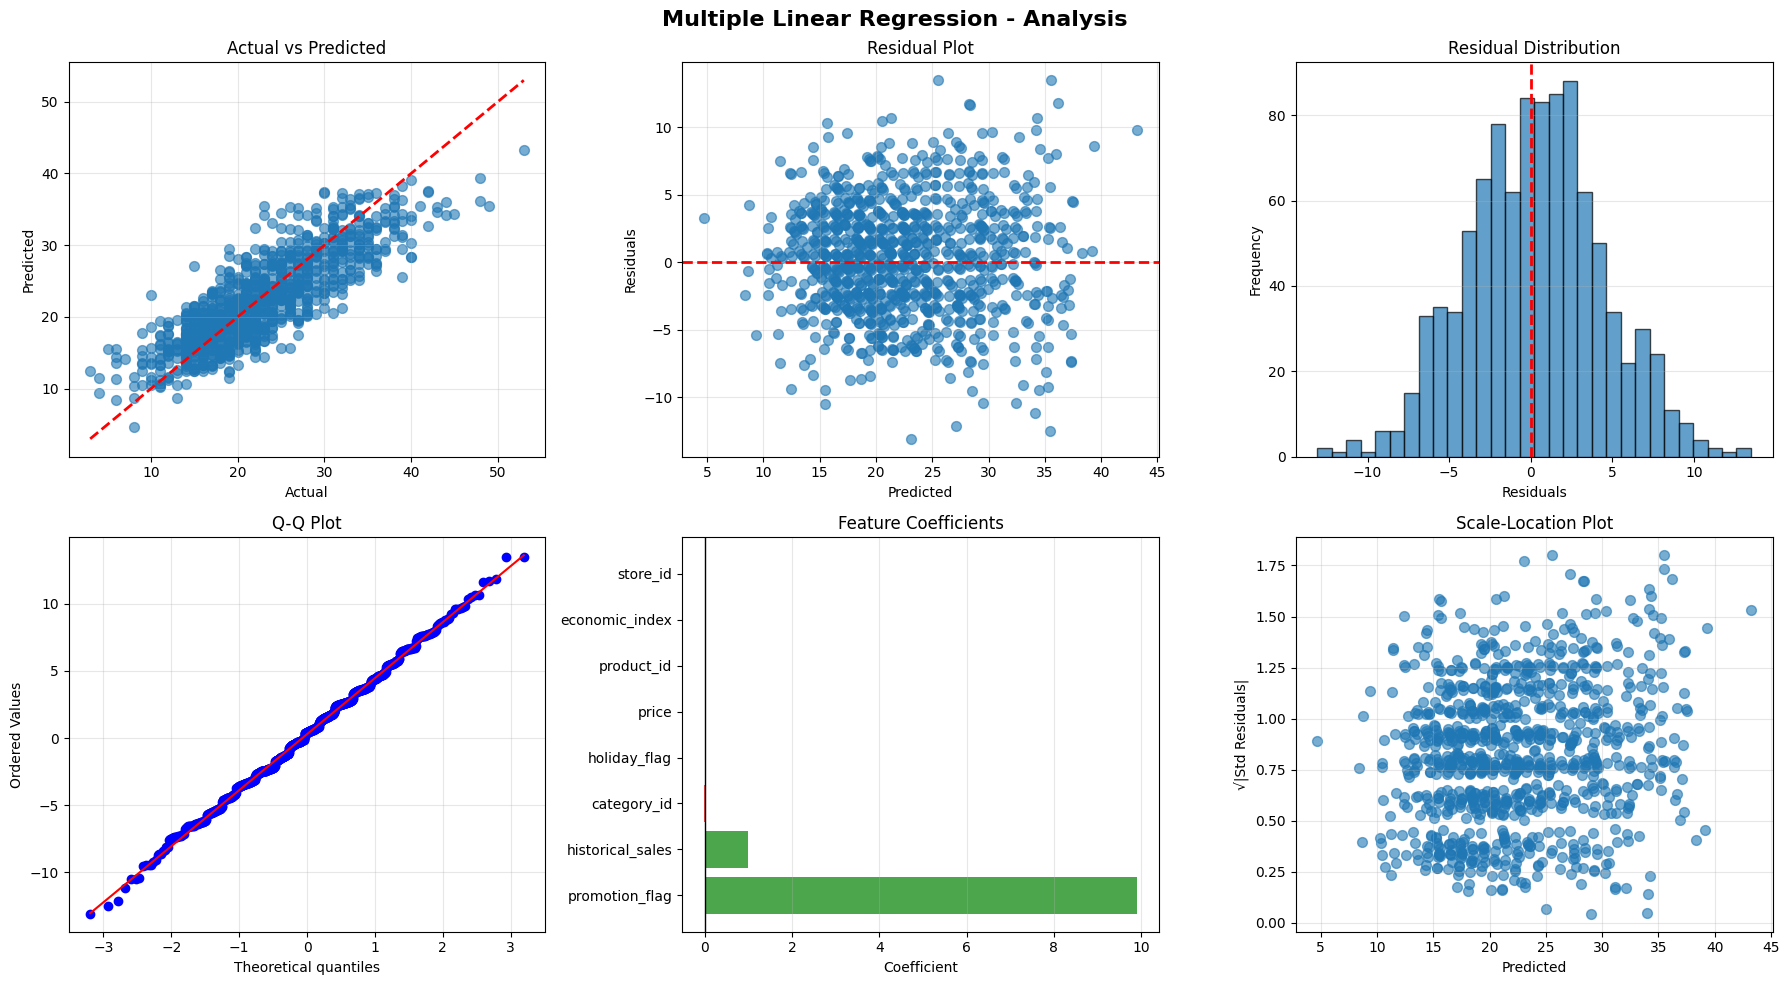


[13] ASSUMPTIONS
Check assumptions? (y/n) [y]: y

REGRESSION ASSUMPTIONS CHECK

1️⃣ LINEARITY
  ✓ Check scatter plots above

2️⃣ INDEPENDENCE (Durbin-Watson: 1.967)
  ✓ No autocorrelation

3️⃣ HOMOSCEDASTICITY
  ✓ Check Scale-Location plot (should be random)

4️⃣ NORMALITY OF RESIDUALS
  Shapiro-Wilk: p=0.3870
  ✓ Residuals are normal (p > 0.05)
  Jarque-Bera: p=0.8947
  ✓ Normal (p > 0.05)

5️⃣ MULTICOLLINEARITY
  ✓ Already checked earlier

[14] NEW PREDICTIONS
Predict new data? (y/n) [n]: n

[15] FINAL SUMMARY

MODEL SUMMARY

Model: Multiple Linear Regression
Target: target_demand
Features (8): product_id, category_id, store_id, historical_sales, price, promotion_flag, holiday_flag, economic_index

Performance:
  R²: 0.6944
  Adjusted R²: 0.6919
  RMSE: 4.1749

Top 3 Features:
  1. promotion_flag: 9.9188
  2. historical_sales: 0.9954
  3. category_id: -0.0282

✓ PIPELINE COMPLETED!


In [ ]:
"""
Multiple Linear Regression (MLR) - Streamlined Implementation
Fixed & Optimized Version
"""

# ===============================================
# 1. IMPORT LIBRARIES
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ===============================================
# 2. MLR FRAMEWORK CLASS
# ===============================================

class MLRFramework:
    """
    Multiple Linear Regression Framework - Cleaned Version
    Fixed bugs and optimized for better performance
    """

    def __init__(self):
        self.data = None
        self.target_column = None
        self.feature_columns = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = None
        self.model = None
        self.y_pred = None
        self.feature_importance = None
        self.use_scaling = False

    def upload_and_load_data(self):
        """Upload CSV file and load dataset"""
        from google.colab import files
        import io

        print("=" * 70)
        print("UPLOAD DATASET")
        print("=" * 70)
        uploaded = files.upload()

        file_name = list(uploaded.keys())[0]
        self.data = pd.read_csv(io.BytesIO(uploaded[file_name]))

        print(f"\n✓ File '{file_name}' loaded successfully!")
        print(f"  Shape: {self.data.shape}")
        print(f"\nFirst 5 rows:")
        print(self.data.head())

        # Quick stats
        print(f"\nDataset Info:")
        print(f"  - Rows: {len(self.data)}")
        print(f"  - Columns: {len(self.data.columns)}")
        print(f"  - Missing values: {self.data.isnull().sum().sum()}")

        return self.data

    def select_columns(self):
        """
        Interactive column selection with auto-select + drop option
        Fixed: Better input validation
        """
        print("\n" + "=" * 70)
        print("COLUMN SELECTION FOR MLR")
        print("=" * 70)

        numeric_cols = self.data.select_dtypes(include=[np.number]).columns.tolist()

        if len(numeric_cols) < 3:
            print("❌ ERROR: Need at least 3 numeric columns (1 target + 2 features)")
            return None, None

        print("\nAvailable numeric columns:")
        for i, col in enumerate(numeric_cols, 1):
            print(f"  {i}. {col}")

        # Select Target
        print("\n" + "-" * 70)
        print("STEP 1: Select Target Column (Y)")
        print("-" * 70)

        while True:
            target_input = input("Enter column number or name: ").strip()

            if target_input.isdigit():
                idx = int(target_input) - 1
                if 0 <= idx < len(numeric_cols):
                    self.target_column = numeric_cols[idx]
                    break
            elif target_input in numeric_cols:
                self.target_column = target_input
                break

            print(f"❌ Invalid input. Choose 1-{len(numeric_cols)}")

        print(f"✓ Target: {self.target_column}")

        # Auto-select features
        print("\n" + "-" * 70)
        print("STEP 2: Auto-Select Features (all except target)")
        print("-" * 70)

        self.feature_columns = [col for col in numeric_cols if col != self.target_column]
        print(f"✓ {len(self.feature_columns)} features auto-selected:")
        for i, feat in enumerate(self.feature_columns, 1):
            print(f"  {i}. {feat}")

        # Drop unwanted features
        print("\n" + "-" * 70)
        print("STEP 3: Drop Unwanted Features (Optional)")
        print("-" * 70)
        print("Press ENTER to keep all, or enter numbers/names to drop (comma-separated)")

        drop_input = input("Columns to drop: ").strip()

        if drop_input:
            to_drop = []
            for inp in [x.strip() for x in drop_input.split(',')]:
                if inp.isdigit():
                    idx = int(inp) - 1
                    if 0 <= idx < len(self.feature_columns):
                        to_drop.append(self.feature_columns[idx])
                elif inp in self.feature_columns:
                    to_drop.append(inp)

            for col in to_drop:
                self.feature_columns.remove(col)

            if to_drop:
                print(f"✓ Dropped: {', '.join(to_drop)}")

        # Validation
        if len(self.feature_columns) < 2:
            print("\n❌ ERROR: Need at least 2 features for MLR")
            return None, None

        # Summary
        print("\n" + "=" * 70)
        print("SELECTION SUMMARY")
        print("=" * 70)
        print(f"Target: {self.target_column}")
        print(f"Features ({len(self.feature_columns)}): {', '.join(self.feature_columns)}")

        confirm = input("\nProceed? (y/n) [y]: ").strip().lower()
        if confirm == 'n':
            return None, None

        return self.feature_columns, self.target_column

    def handle_missing_values(self, strategy='drop'):
        """
        Handle missing values
        Fixed: Works only on selected columns
        """
        selected_cols = self.feature_columns + [self.target_column]
        df_work = self.data[selected_cols].copy()

        missing_count = df_work.isnull().sum().sum()
        if missing_count == 0:
            print("✓ No missing values")
            self.data = df_work
            return

        print(f"\nMissing values found: {missing_count}")

        if strategy == 'drop':
            df_work = df_work.dropna()
            print(f"✓ Dropped {len(self.data) - len(df_work)} rows")
        elif strategy == 'mean':
            df_work = df_work.fillna(df_work.mean())
            print("✓ Filled with mean")
        elif strategy == 'median':
            df_work = df_work.fillna(df_work.median())
            print("✓ Filled with median")

        self.data = df_work
        print(f"✓ New shape: {self.data.shape}")

    def handle_outliers(self, method='zscore', threshold=3):
        """
        Handle outliers
        Fixed: Proper handling of numeric data only
        """
        df_work = self.data.copy()
        rows_before = len(df_work)

        print(f"\nRows before: {rows_before}")

        if method == 'zscore':
            # FIX: Apply zscore only to numeric columns
            numeric_data = df_work.select_dtypes(include=[np.number])
            z_scores = np.abs(stats.zscore(numeric_data))
            mask = (z_scores < threshold).all(axis=1)
            df_work = df_work[mask]
            print(f"✓ Method: Z-score (threshold={threshold})")

        elif method == 'iqr':
            # FIX: Apply IQR only to numeric columns
            numeric_data = df_work.select_dtypes(include=[np.number])
            Q1 = numeric_data.quantile(0.25)
            Q3 = numeric_data.quantile(0.75)
            IQR = Q3 - Q1
            mask = ~((numeric_data < (Q1 - 1.5 * IQR)) |
                     (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
            df_work = df_work[mask]
            print("✓ Method: IQR")

        outliers_removed = rows_before - len(df_work)
        print(f"✓ Removed {outliers_removed} outliers")
        print(f"✓ Rows after: {len(df_work)}")

        self.data = df_work

    def check_multicollinearity(self):
        """Check multicollinearity with correlation matrix and VIF"""
        print("\n" + "=" * 70)
        print("MULTICOLLINEARITY CHECK")
        print("=" * 70)

        X_df = self.data[self.feature_columns]
        corr_matrix = X_df.corr()

        # Visualize
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                    center=0, square=True, linewidths=1)
        plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # High correlations
        print("\n⚠️ High Correlations (|r| > 0.8):")
        high_corr_found = False
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.8:
                    print(f"  - {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")
                    high_corr_found = True

        if not high_corr_found:
            print("  ✓ None detected")

        # VIF (optional)
        try:
            from statsmodels.stats.outliers_influence import variance_inflation_factor

            vif_data = pd.DataFrame({
                'Feature': self.feature_columns,
                'VIF': [variance_inflation_factor(X_df.values, i)
                       for i in range(len(self.feature_columns))]
            })

            print("\n📊 VIF Values:")
            print(vif_data.to_string(index=False))
            print("\n💡 VIF > 10 indicates high multicollinearity")

        except ImportError:
            print("\n⚠️ Install statsmodels for VIF: pip install statsmodels")

    def normalize_data(self, method='standardization'):
        """
        Normalize/standardize features
        Fixed: Proper flag tracking
        """
        X = self.data[self.feature_columns]
        y = self.data[self.target_column]

        print(f"\n✓ Applying {method}...")

        if method == 'normalization':
            self.scaler = MinMaxScaler()
            print("  Formula: (X - min) / (max - min) → [0, 1]")
        else:
            self.scaler = StandardScaler()
            print("  Formula: (X - μ) / σ → mean=0, std=1")

        X_scaled = self.scaler.fit_transform(X)

        # Store scaled data
        self.data_scaled = pd.DataFrame(X_scaled, columns=self.feature_columns)
        self.data_scaled[self.target_column] = y.values
        self.use_scaling = True

        print(f"✓ Data normalized: {self.data_scaled.shape}")

    def prepare_data(self):
        """
        Prepare X and y arrays
        Fixed: Consistent data source selection
        """
        # FIX: Use scaled data if available
        source_data = self.data_scaled if self.use_scaling else self.data

        self.X = source_data[self.feature_columns].values
        self.y = source_data[self.target_column].values

        print(f"\n✓ Data prepared:")
        print(f"  X shape: {self.X.shape}")
        print(f"  y shape: {self.y.shape}")

        return self.X, self.y

    def split_data(self, test_size=0.2, random_state=42):
        """Split data into train/test sets"""
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )

        print(f"✓ Train: {len(self.X_train)} | Test: {len(self.X_test)}")
        return self.X_train, self.X_test, self.y_train, self.y_test

    def train_model(self):
        """Train MLR model"""
        self.model = LinearRegression()
        self.model.fit(self.X_train, self.y_train)

        print("\n" + "=" * 70)
        print("MODEL TRAINED")
        print("=" * 70)
        print(f"Intercept (β₀): {self.model.intercept_:.4f}")
        print("\nCoefficients:")
        for feat, coef in zip(self.feature_columns, self.model.coef_):
            print(f"  {feat}: {coef:.4f}")

        # Feature importance
        self.feature_importance = pd.DataFrame({
            'Feature': self.feature_columns,
            'Coefficient': self.model.coef_,
            'Abs_Coef': np.abs(self.model.coef_)
        }).sort_values('Abs_Coef', ascending=False)

        return self.model

    def predict_and_evaluate(self):
        """Make predictions and evaluate"""
        y_pred_train = self.model.predict(self.X_train)
        self.y_pred = self.model.predict(self.X_test)

        # Metrics
        train_r2 = r2_score(self.y_train, y_pred_train)
        test_r2 = r2_score(self.y_test, self.y_pred)
        test_rmse = np.sqrt(mean_squared_error(self.y_test, self.y_pred))
        test_mae = mean_absolute_error(self.y_test, self.y_pred)

        # Adjusted R²
        n = len(self.y_test)
        p = self.X_test.shape[1]
        adj_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

        print("\n" + "=" * 70)
        print("MODEL EVALUATION")
        print("=" * 70)
        print(f"Train R²:      {train_r2:.4f}")
        print(f"Test R²:       {test_r2:.4f}")
        print(f"Adjusted R²:   {adj_r2:.4f}")
        print(f"RMSE:          {test_rmse:.4f}")
        print(f"MAE:           {test_mae:.4f}")

        # Interpretation
        if test_r2 >= 0.9:
            print("\n✓ Excellent model (R² ≥ 0.9)")
        elif test_r2 >= 0.7:
            print("\n✓ Good model (R² ≥ 0.7)")
        elif test_r2 >= 0.5:
            print("\n⚠️ Moderate model (R² ≥ 0.5)")
        else:
            print("\n❌ Poor model (R² < 0.5)")

        # Overfitting check
        if train_r2 - test_r2 > 0.1:
            print(f"⚠️ Possible overfitting (train-test gap: {train_r2-test_r2:.3f})")

        return self.y_pred, train_r2, test_r2, adj_r2

    def visualize_results(self):
        """Visualize regression results"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle('Multiple Linear Regression - Analysis',
                     fontsize=16, fontweight='bold')

        # 1. Actual vs Predicted
        ax = axes[0, 0]
        ax.scatter(self.y_test, self.y_pred, alpha=0.6, s=50)
        min_val = min(self.y_test.min(), self.y_pred.min())
        max_val = max(self.y_test.max(), self.y_pred.max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
        ax.set_xlabel('Actual')
        ax.set_ylabel('Predicted')
        ax.set_title('Actual vs Predicted')
        ax.grid(True, alpha=0.3)

        # 2. Residual Plot
        residuals = self.y_test - self.y_pred
        ax = axes[0, 1]
        ax.scatter(self.y_pred, residuals, alpha=0.6, s=50)
        ax.axhline(y=0, color='r', linestyle='--', lw=2)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Residuals')
        ax.set_title('Residual Plot')
        ax.grid(True, alpha=0.3)

        # 3. Residual Distribution
        ax = axes[0, 2]
        ax.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
        ax.axvline(x=0, color='r', linestyle='--', lw=2)
        ax.set_xlabel('Residuals')
        ax.set_ylabel('Frequency')
        ax.set_title('Residual Distribution')
        ax.grid(True, alpha=0.3, axis='y')

        # 4. Q-Q Plot
        ax = axes[1, 0]
        stats.probplot(residuals, dist="norm", plot=ax)
        ax.set_title('Q-Q Plot')
        ax.grid(True, alpha=0.3)

        # 5. Feature Importance
        ax = axes[1, 1]
        colors = ['green' if x > 0 else 'red'
                  for x in self.feature_importance['Coefficient']]
        ax.barh(self.feature_importance['Feature'],
                self.feature_importance['Coefficient'],
                color=colors, alpha=0.7)
        ax.axvline(x=0, color='black', lw=1)
        ax.set_xlabel('Coefficient')
        ax.set_title('Feature Coefficients')
        ax.grid(True, alpha=0.3, axis='x')

        # 6. Scale-Location Plot
        ax = axes[1, 2]
        residuals_sqrt = np.sqrt(np.abs(residuals / residuals.std()))
        ax.scatter(self.y_pred, residuals_sqrt, alpha=0.6, s=50)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('√|Std Residuals|')
        ax.set_title('Scale-Location Plot')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def check_assumptions(self):
        """Check MLR assumptions"""
        residuals = self.y_test - self.y_pred

        print("\n" + "=" * 70)
        print("REGRESSION ASSUMPTIONS CHECK")
        print("=" * 70)

        # 1. Linearity
        print("\n1️⃣ LINEARITY")
        print("  ✓ Check scatter plots above")

        # 2. Independence (Durbin-Watson)
        try:
            from statsmodels.stats.stattools import durbin_watson
            dw = durbin_watson(residuals)
            print(f"\n2️⃣ INDEPENDENCE (Durbin-Watson: {dw:.3f})")
            if 1.5 < dw < 2.5:
                print("  ✓ No autocorrelation")
            else:
                print("  ⚠️ Possible autocorrelation")
        except ImportError:
            print("\n2️⃣ INDEPENDENCE: Install statsmodels for D-W test")

        # 3. Homoscedasticity
        print("\n3️⃣ HOMOSCEDASTICITY")
        print("  ✓ Check Scale-Location plot (should be random)")

        # 4. Normality
        print("\n4️⃣ NORMALITY OF RESIDUALS")
        if len(residuals) <= 5000:
            stat, p = stats.shapiro(residuals)
            print(f"  Shapiro-Wilk: p={p:.4f}")
            if p > 0.05:
                print("  ✓ Residuals are normal (p > 0.05)")
            else:
                print("  ⚠️ Residuals not normal (p < 0.05)")

        jb_stat, jb_p = stats.jarque_bera(residuals)
        print(f"  Jarque-Bera: p={jb_p:.4f}")
        if jb_p > 0.05:
            print("  ✓ Normal (p > 0.05)")
        else:
            print("  ⚠️ Not normal (p < 0.05)")

        # 5. Multicollinearity
        print("\n5️⃣ MULTICOLLINEARITY")
        print("  ✓ Already checked earlier")

    def cross_validate(self, cv=5):
        """Perform cross-validation"""
        print(f"\n{'='*70}")
        print(f"CROSS-VALIDATION ({cv}-Fold)")
        print(f"{'='*70}")

        cv_scores = cross_val_score(self.model, self.X, self.y,
                                    cv=cv, scoring='r2')

        print(f"\nR² Scores per fold:")
        for i, score in enumerate(cv_scores, 1):
            print(f"  Fold {i}: {score:.4f}")

        print(f"\nSummary:")
        print(f"  Mean R²: {cv_scores.mean():.4f}")
        print(f"  Std Dev: {cv_scores.std():.4f}")

        if cv_scores.std() < 0.05:
            print("  ✓ Stable model (low variance)")
        else:
            print("  ⚠️ Some variance across folds")

        return cv_scores

    def predict_new(self):
        """Interactive prediction for new data"""
        print("\n" + "=" * 70)
        print("PREDICT NEW DATA")
        print("=" * 70)

        try:
            new_data = []
            for feature in self.feature_columns:
                value = float(input(f"{feature}: ").strip())
                new_data.append(value)

            X_new = np.array(new_data).reshape(1, -1)

            if self.scaler:
                X_new = self.scaler.transform(X_new)

            prediction = self.model.predict(X_new)[0]

            print(f"\n📊 PREDICTION RESULT:")
            for feat, val in zip(self.feature_columns, new_data):
                print(f"  {feat}: {val:.2f}")
            print(f"\nPredicted {self.target_column}: {prediction:.4f}")

            return prediction

        except Exception as e:
            print(f"❌ Error: {e}")
            return None

    def summary(self):
        """
        Display model summary
        Fixed: Proper indexing for feature importance
        """
        print("\n" + "=" * 70)
        print("MODEL SUMMARY")
        print("=" * 70)

        test_r2 = r2_score(self.y_test, self.y_pred)
        n = len(self.y_test)
        p = self.X_test.shape[1]
        adj_r2 = 1 - (1 - test_r2) * (n - 1) / (n - p - 1)

        print(f"\nModel: Multiple Linear Regression")
        print(f"Target: {self.target_column}")
        print(f"Features ({len(self.feature_columns)}): {', '.join(self.feature_columns)}")
        print(f"\nPerformance:")
        print(f"  R²: {test_r2:.4f}")
        print(f"  Adjusted R²: {adj_r2:.4f}")
        print(f"  RMSE: {np.sqrt(mean_squared_error(self.y_test, self.y_pred)):.4f}")

        # FIX: Proper iteration without index arithmetic
        print(f"\nTop 3 Features:")
        for rank, (_, row) in enumerate(self.feature_importance.head(3).iterrows(), 1):
            print(f"  {rank}. {row['Feature']}: {row['Coefficient']:.4f}")

# ===============================================
# 3. MAIN EXECUTION
# ===============================================

def main():
    """Main pipeline execution"""
    print("=" * 70)
    print("MULTIPLE LINEAR REGRESSION (MLR)")
    print("Streamlined & Debugged Version")
    print("=" * 70)

    mlr = MLRFramework()

    # 1. Load data
    print("\n[1] DATA LOADING")
    mlr.upload_and_load_data()

    # 2. Select columns
    print("\n[2] COLUMN SELECTION")
    if mlr.select_columns() == (None, None):
        return

    # 3. Missing values
    print("\n[3] MISSING VALUES")
    strategy = input("Strategy (drop/mean/median) [drop]: ").strip().lower() or 'drop'
    mlr.handle_missing_values(strategy)

    # 4. Outliers
    print("\n[4] OUTLIERS")
    if input("Handle outliers? (y/n) [n]: ").strip().lower() == 'y':
        method = input("Method (zscore/iqr) [zscore]: ").strip().lower() or 'zscore'
        mlr.handle_outliers(method)

    # 5. Multicollinearity
    print("\n[5] MULTICOLLINEARITY")
    if input("Check? (y/n) [y]: ").strip().lower() != 'n':
        mlr.check_multicollinearity()

    # 6. Normalization
    print("\n[6] NORMALIZATION")
    if input("Normalize? (y/n) [n]: ").strip().lower() == 'y':
        method = input("Method (normalization/standardization) [standardization]: ").strip().lower()
        mlr.normalize_data(method or 'standardization')

    # 7-8. Prepare and split
    print("\n[7] DATA PREPARATION")
    mlr.prepare_data()

    print("\n[8] TRAIN-TEST SPLIT")
    test_size = input("Test size [0.2]: ").strip()
    mlr.split_data(float(test_size) if test_size else 0.2)

    # 9-10. Train and evaluate
    print("\n[9] TRAINING")
    mlr.train_model()

    print("\n[10] EVALUATION")
    y_pred, train_r2, test_r2, adj_r2 = mlr.predict_and_evaluate()

    # 11. Cross-validation
    print("\n[11] CROSS-VALIDATION")
    if input("Perform CV? (y/n) [y]: ").strip().lower() != 'n':
        mlr.cross_validate()

    # 12. Visualization
    print("\n[12] VISUALIZATION")
    if input("Show plots? (y/n) [y]: ").strip().lower() != 'n':
        mlr.visualize_results()

    # 13. Assumptions
    print("\n[13] ASSUMPTIONS")
    if input("Check assumptions? (y/n) [y]: ").strip().lower() != 'n':
        mlr.check_assumptions()

    # 14. New predictions
    print("\n[14] NEW PREDICTIONS")
    while input("Predict new data? (y/n) [n]: ").strip().lower() == 'y':
        mlr.predict_new()

    # 15. Summary
    print("\n[15] FINAL SUMMARY")
    mlr.summary()

    print("\n" + "=" * 70)
    print("✓ PIPELINE COMPLETED!")
    print("=" * 70)

if __name__ == "__main__":
    main()

**LOGISTIC LINEAR REGRESSION**

LOGISTIC REGRESSION (LR)
Complete Classification Framework
Binary & Multiclass Classification

[1] DATA LOADING
UPLOAD DATASET


Saving demand_forecasting_dataset .csv to demand_forecasting_dataset .csv

✓ File 'demand_forecasting_dataset .csv' loaded successfully!
  Shape: (4921, 10)

First 5 rows:
         date  product_id  category_id  store_id  historical_sales  price  \
0  2022-01-02        1043            4         9                16  48.29   
1  2022-01-02        1012            4         2                25  44.01   
2  2022-01-03        1003            5         4                26   9.44   
3  2022-01-03        1005            4         1                23   5.42   
4  2022-01-04        1011            1         5                12  21.86   

   promotion_flag  holiday_flag  economic_index  target_demand  
0               0             0           84.07              8  
1               0             0          106.87             22  
2               1             0          104.98             29  
3               1             1           92.75             22  
4               1             1         

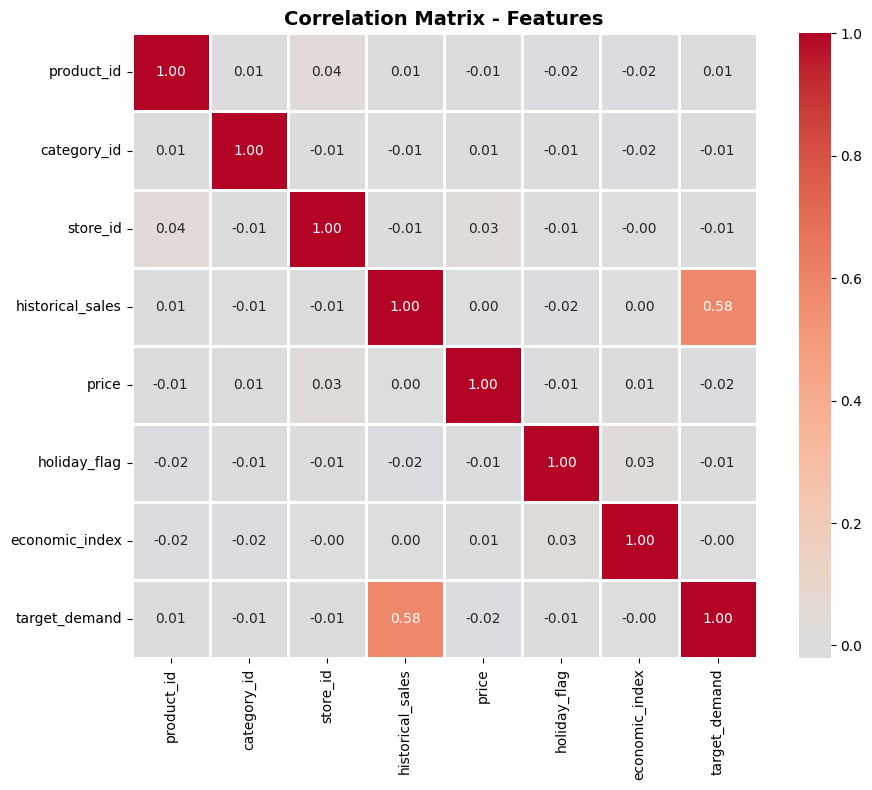


⚠️  High Correlations (|r| > 0.8):
  ✓ None detected

[7] NORMALIZATION
Normalize? (y/n) [y]: y
Method (normalization/standardization) [standardization]: standarization

✓ Applying standarization...
  Formula: (X - μ) / σ → mean=0, std=1
✓ Data normalized: (4921, 9)

[8] DATA PREPARATION

✓ Data prepared:
  X shape: (4921, 8)
  y shape: (4921,)
  Unique classes: [0 1]

[9] TRAIN-TEST SPLIT
Test size [0.2]: 0.2
Use stratification? (y/n) [y]: y
✓ Train: 3936 | Test: 985

Class distribution:
  Train: [2788 1148]
  Test:  [698 287]

[10] TRAINING MODEL
Solvers: lbfgs (default), liblinear, saga, newton-cg
Solver [lbfgs]: lbfgs
Handle class imbalance with balanced weights? (y/n) [n]: n

MODEL TRAINED
Model: Logistic Regression
  - Solver: lbfgs
  - Multi-class: ovr
  - Max iterations: 1000
  - Class weight: None

Model Parameters:
  - Intercept: [-1.85060157]
  - Coefficients shape: (1, 8)

Top Features by Importance:
            Feature  Coefficient
7     target_demand     4.192263
3  hist

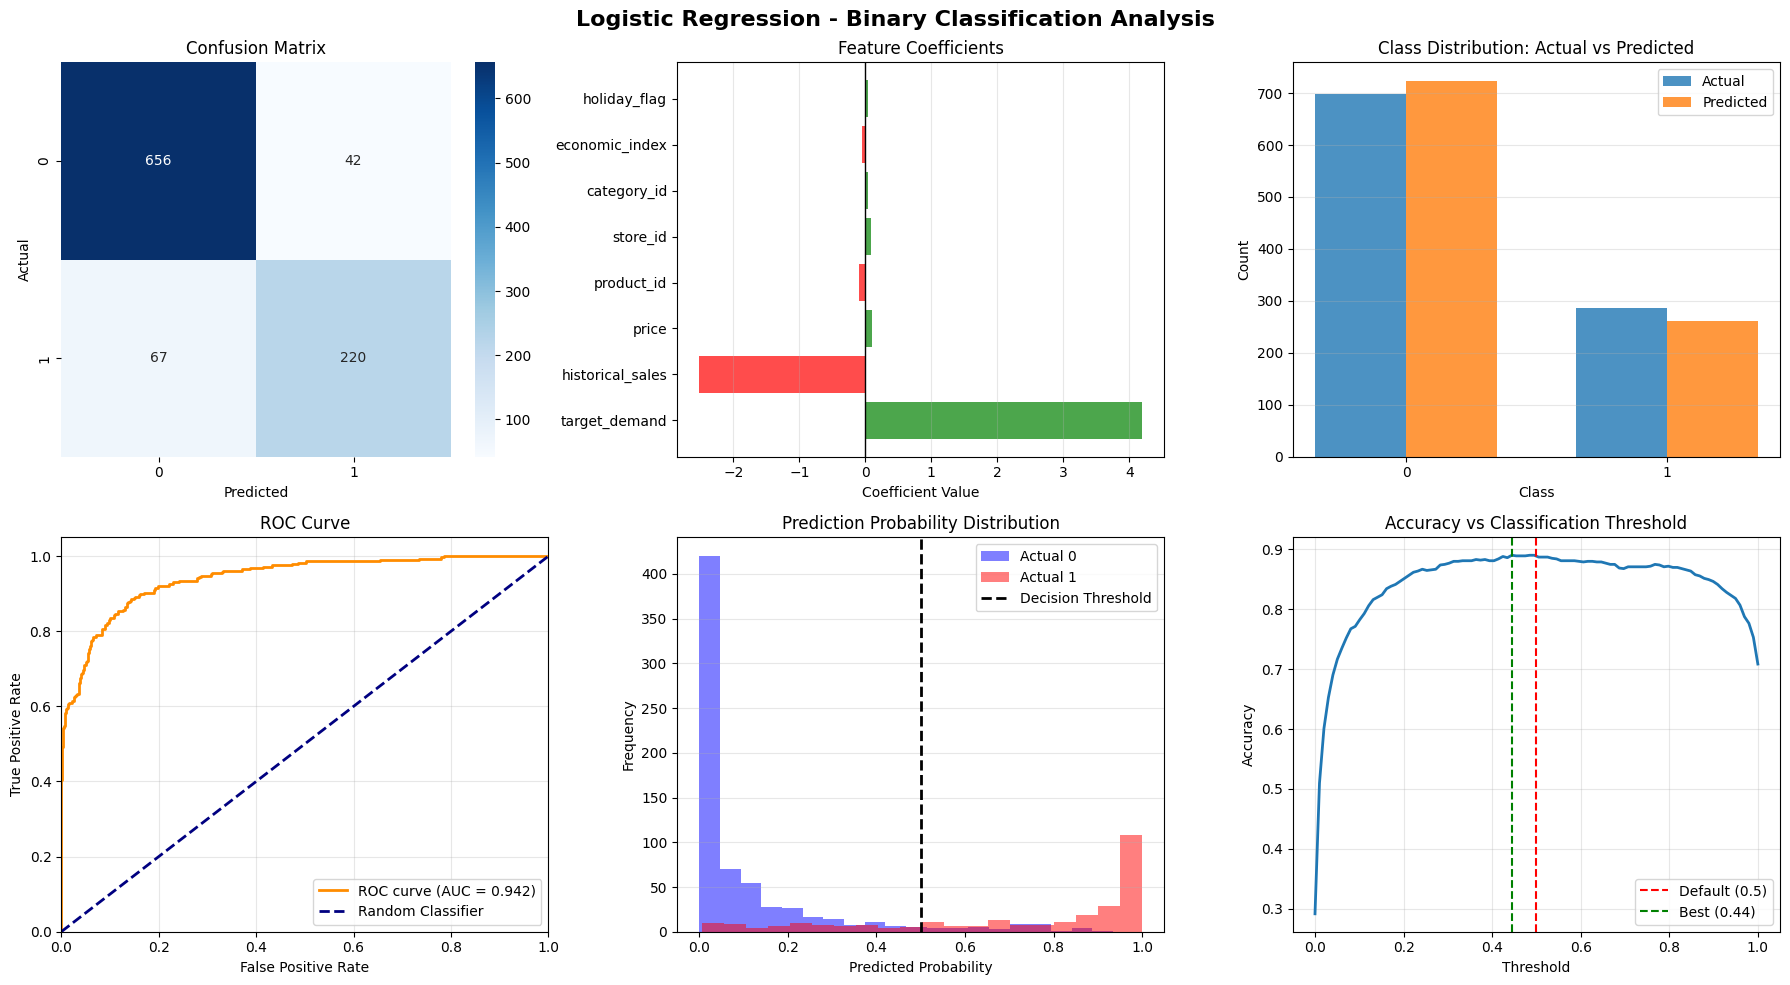


✓ Visualizations completed!

[14] ASSUMPTIONS CHECK
Check assumptions? (y/n) [y]: y

LOGISTIC REGRESSION ASSUMPTIONS CHECK

1️⃣  DEPENDENT VARIABLE TYPE
  ✓ Target has 2 classes: ['0', '1']
  ✓ Binary classification - assumption satisfied

2️⃣  INDEPENDENCE OF OBSERVATIONS
  💡 Assumed: Each observation is independent
  ⚠️  Check your data collection method

3️⃣  LINEARITY OF LOGIT
  💡 Relationship between features and log-odds should be linear
  ✓ Check scatter plots of features vs log-odds

4️⃣  NO MULTICOLLINEARITY
  ✓ Already checked in correlation matrix
  ✓ 8 features analyzed

5️⃣  SAMPLE SIZE
  Training samples: 3936
  Features: 8
  Recommended minimum: 90
  ✓ Sample size is adequate

6️⃣  OUTLIERS & INFLUENTIAL POINTS
  💡 Logistic regression is sensitive to outliers
  ✓ Already handled in preprocessing if selected

[15] THRESHOLD TUNING
Tune classification threshold? (y/n) [n]: n

[16] NEW PREDICTIONS
Predict new data? (y/n) [n]: n

[17] FINAL SUMMARY

MODEL SUMMARY

Model: Lo

In [1]:
"""
Logistic Regression (LR) - Complete Implementation
Based on Module 4b Framework - Advanced Logistics Data Analytics
Standardized Structure - Clean & Optimized
"""

# ===============================================
# 1. IMPORT LIBRARIES
# ===============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, auc, roc_auc_score)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# ===============================================
# 2. LOGISTIC REGRESSION FRAMEWORK CLASS
# ===============================================

class LogisticRegressionFramework:
    """
    Complete Logistic Regression Framework Implementation
    For Binary and Multiclass Classification
    Standardized structure following MLR framework
    """

    def __init__(self):
        self.data = None
        self.target_column = None
        self.feature_columns = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = None
        self.label_encoder = None
        self.model = None
        self.y_pred = None
        self.y_pred_proba = None
        self.feature_importance = None
        self.use_scaling = False
        self.is_binary = True
        self.class_names = None

    def upload_and_load_data(self):
        """Upload CSV file and load dataset"""
        from google.colab import files
        import io

        print("=" * 70)
        print("UPLOAD DATASET")
        print("=" * 70)
        uploaded = files.upload()

        file_name = list(uploaded.keys())[0]
        self.data = pd.read_csv(io.BytesIO(uploaded[file_name]))

        print(f"\n✓ File '{file_name}' loaded successfully!")
        print(f"  Shape: {self.data.shape}")
        print(f"\nFirst 5 rows:")
        print(self.data.head())

        print(f"\nDataset Info:")
        print(f"  - Rows: {len(self.data)}")
        print(f"  - Columns: {len(self.data.columns)}")
        print(f"  - Missing values: {self.data.isnull().sum().sum()}")

        # Show column types
        print(f"\nColumn Types:")
        print(self.data.dtypes)

        return self.data

    def select_columns(self):
        """
        Interactive column selection for Classification
        Target: Categorical variable (binary or multiclass)
        Features: All numeric variables (auto-select with drop option)
        """
        print("\n" + "=" * 70)
        print("COLUMN SELECTION FOR LOGISTIC REGRESSION")
        print("=" * 70)
        print("Logistic Regression: P(Y=1) = 1 / (1 + e^-(β₀ + β₁X₁ + ... + βₙXₙ))")
        print("  - Target (Y):   Categorical variable (2+ classes)")
        print("  - Features (X): Numeric independent variables")

        # Get numeric columns for features
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns.tolist()

        # Get all columns for target (can be categorical or numeric)
        all_cols = self.data.columns.tolist()

        if len(numeric_cols) < 2:
            print("❌ ERROR: Need at least 2 numeric columns for features")
            return None, None

        print("\nAll available columns:")
        for i, col in enumerate(all_cols, 1):
            dtype = self.data[col].dtype
            unique_vals = self.data[col].nunique()
            print(f"  {i}. {col:<25} [{dtype}] - {unique_vals} unique values")

        # ===================================================
        # STEP 1: Select Target Column (Y) - Categorical
        # ===================================================
        print("\n" + "-" * 70)
        print("STEP 1: Select Target Column (Y - Categorical)")
        print("-" * 70)
        print("💡 Target should be categorical (e.g., 'Yes/No', '0/1', 'Class A/B/C')")

        while True:
            target_input = input("Enter column number or name: ").strip()

            if target_input.isdigit():
                idx = int(target_input) - 1
                if 0 <= idx < len(all_cols):
                    self.target_column = all_cols[idx]
                    break
            elif target_input in all_cols:
                self.target_column = target_input
                break

            print(f"❌ Invalid input. Choose 1-{len(all_cols)}")

        # Check if target is categorical
        n_classes = self.data[self.target_column].nunique()
        unique_values = self.data[self.target_column].unique()

        print(f"\n✓ Target: {self.target_column}")
        print(f"  - Number of classes: {n_classes}")
        print(f"  - Classes: {unique_values}")

        if n_classes < 2:
            print("❌ ERROR: Target must have at least 2 classes")
            return None, None

        self.is_binary = (n_classes == 2)
        if self.is_binary:
            print("  - Type: BINARY Classification")
        else:
            print(f"  - Type: MULTICLASS Classification ({n_classes} classes)")

        # ===================================================
        # STEP 2: Auto-select Features (numeric only)
        # ===================================================
        print("\n" + "-" * 70)
        print("STEP 2: Auto-Select Features (numeric columns only)")
        print("-" * 70)

        # Remove target from feature list if it's numeric
        available_features = [col for col in numeric_cols if col != self.target_column]

        if len(available_features) < 1:
            print("❌ ERROR: Need at least 1 numeric feature")
            return None, None

        self.feature_columns = available_features.copy()
        print(f"✓ {len(self.feature_columns)} features auto-selected:")
        for i, feat in enumerate(self.feature_columns, 1):
            print(f"  {i}. {feat}")

        # ===================================================
        # STEP 3: Drop unwanted features (optional)
        # ===================================================
        print("\n" + "-" * 70)
        print("STEP 3: Drop Unwanted Features (Optional)")
        print("-" * 70)
        print("Press ENTER to keep all, or enter numbers/names to drop")

        drop_input = input("Columns to drop: ").strip()

        if drop_input:
            to_drop = []
            for inp in [x.strip() for x in drop_input.split(',')]:
                if inp.isdigit():
                    idx = int(inp) - 1
                    if 0 <= idx < len(self.feature_columns):
                        to_drop.append(self.feature_columns[idx])
                elif inp in self.feature_columns:
                    to_drop.append(inp)

            for col in to_drop:
                self.feature_columns.remove(col)

            if to_drop:
                print(f"✓ Dropped: {', '.join(to_drop)}")

        # Validation
        if len(self.feature_columns) < 1:
            print("\n❌ ERROR: Need at least 1 feature")
            return None, None

        # ===================================================
        # FINAL SUMMARY
        # ===================================================
        print("\n" + "=" * 70)
        print("SELECTION SUMMARY")
        print("=" * 70)
        print(f"Target: {self.target_column}")
        print(f"  - Classes ({n_classes}): {unique_values}")
        print(f"  - Classification Type: {'Binary' if self.is_binary else 'Multiclass'}")
        print(f"\nFeatures ({len(self.feature_columns)}): {', '.join(self.feature_columns)}")

        # Show class distribution
        print(f"\nClass Distribution:")
        class_dist = self.data[self.target_column].value_counts()
        # Limit printing for very large number of classes
        if len(class_dist) > 50:
            print("  (Showing top 50 classes due to large number of unique values)")
            class_dist = class_dist.head(50)
        for cls, count in class_dist.items():
            percentage = (count / len(self.data)) * 100
            print(f"  - {cls}: {count} ({percentage:.1f}%)")

        # Check for imbalanced dataset
        if class_dist.max() / class_dist.min() > 3:
            print("\n⚠️  WARNING: Dataset appears imbalanced!")
            print("   Consider using SMOTE or class_weight='balanced'")

        confirm = input("\nProceed? (y/n) [y]: ").strip().lower()
        if confirm == 'n':
            return None, None

        return self.feature_columns, self.target_column

    def handle_missing_values(self, strategy='drop'):
        """Handle missing values in selected columns"""
        selected_cols = self.feature_columns + [self.target_column]
        df_work = self.data[selected_cols].copy()

        missing_count = df_work.isnull().sum().sum()
        if missing_count == 0:
            print("✓ No missing values")
            self.data = df_work
            return

        print(f"\nMissing values found: {missing_count}")

        if strategy == 'drop':
            df_work = df_work.dropna()
            print(f"✓ Dropped {len(self.data) - len(df_work)} rows")
        elif strategy == 'mean':
            # Only fill numeric columns
            numeric_cols = df_work.select_dtypes(include=[np.number]).columns
            df_work[numeric_cols] = df_work[numeric_cols].fillna(df_work[numeric_cols].mean())
            print("✓ Filled numeric columns with mean")
        elif strategy == 'median':
            numeric_cols = df_work.select_dtypes(include=[np.number]).columns
            df_work[numeric_cols] = df_work[numeric_cols].fillna(df_work[numeric_cols].median())
            print("✓ Filled numeric columns with median")

        self.data = df_work
        print(f"✓ New shape: {self.data.shape}")

    def handle_outliers(self, method='zscore', threshold=3):
        """Handle outliers in numeric features only"""
        df_work = self.data.copy()
        rows_before = len(df_work)

        print(f"\nRows before: {rows_before}")

        # Apply outlier detection only to feature columns (numeric)
        feature_data = df_work[self.feature_columns]

        if method == 'zscore':
            z_scores = np.abs(stats.zscore(feature_data))
            mask = (z_scores < threshold).all(axis=1)
            df_work = df_work[mask]
            print(f"✓ Method: Z-score (threshold={threshold})")

        elif method == 'iqr':
            Q1 = feature_data.quantile(0.25)
            Q3 = feature_data.quantile(0.75)
            IQR = Q3 - Q1
            mask = ~((feature_data < (Q1 - 1.5 * IQR)) |
                     (feature_data > (Q3 + 1.5 * IQR))).any(axis=1)
            df_work = df_work[mask]
            print("✓ Method: IQR")

        outliers_removed = rows_before - len(df_work)
        print(f"✓ Removed {outliers_removed} outliers")
        print(f"✓ Rows after: {len(df_work)}")

        self.data = df_work

    def encode_target(self):
        """
        Encode categorical target variable
        For binary: 0 and 1
        For multiclass: 0, 1, 2, ..., n
        """
        print("\n" + "=" * 70)
        print("TARGET ENCODING")
        print("=" * 70)

        # Store original class names
        # If the target column is numeric, convert it to a string type before sorting
        # to ensure that class_names is a list of strings, consistent with LabelEncoder's output.
        if self.data[self.target_column].dtype in [np.int64, np.float64]:
            # If it's numeric, ensure there are at least 2 unique values to classify
            if self.data[self.target_column].nunique() < 2:
                print("❌ ERROR: Target column has less than 2 unique values after preprocessing. Cannot encode for classification.")
                raise ValueError("Target column has insufficient unique values for classification.")
            # Convert to string to handle unique values as class names consistently
            self.class_names = sorted(self.data[self.target_column].astype(str).unique())
        else:
            self.class_names = sorted(self.data[self.target_column].unique())

        # Check if already numeric and if it's a suitable classification target
        if self.data[self.target_column].dtype in [np.int64, np.float64] and self.data[self.target_column].nunique() <= 50: # Heuristic: if numeric with many unique values, assume it's not ideal for direct classification
            print("✓ Target is already numeric and seems suitable for classification.")
            self.y_encoded = self.data[self.target_column].values
        elif self.data[self.target_column].dtype in [np.int64, np.float64] and self.data[self.target_column].nunique() > 50:
            print("  WARNING: Target is numeric but has a very large number of unique values. This might not be suitable for direct classification and can lead to issues with stratification.")
            # Offer to discretize or confirm if they want to proceed as is
            if input("Do you want to discretize the target into bins (y/n)? [n]: ").strip().lower() == 'y':
                n_bins = int(input("Enter number of bins for discretization (e.g., 5, 10): ").strip())
                self.data[self.target_column] = pd.cut(self.data[self.target_column], bins=n_bins, labels=False, include_lowest=True)
                print(f"✓ Target '{self.target_column}' discretized into {n_bins} bins.")
                # Recalculate class_names after binning
                self.class_names = sorted(self.data[self.target_column].astype(str).unique())
                self.y_encoded = self.data[self.target_column].values
            else:
                print("  Proceeding with highly granular numeric target. Be aware of potential stratification issues.")
                self.y_encoded = self.data[self.target_column].values
        else:
            # Encode categorical to numeric
            self.label_encoder = LabelEncoder()
            self.y_encoded = self.label_encoder.fit_transform(self.data[self.target_column])
            self.class_names = [str(cls) for cls in self.label_encoder.classes_]

            print("✓ Target encoded to numeric:")
            for i, cls in enumerate(self.label_encoder.classes_):
                print(f"  {cls} → {i}")

        # Update data with encoded target
        self.data[self.target_column] = self.y_encoded

        # Update self.is_binary based on the *encoded* target's unique values
        self.is_binary = (np.unique(self.y_encoded).size == 2)

        return self.y_encoded

    def check_multicollinearity(self):
        """Check multicollinearity among features"""
        print("\n" + "=" * 70)
        print("MULTICOLLINEARITY CHECK")
        print("=" * 70)

        X_df = self.data[self.feature_columns]
        corr_matrix = X_df.corr()

        # Visualize
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                    center=0, square=True, linewidths=1)
        plt.title('Correlation Matrix - Features', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # High correlations
        print("\n⚠️  High Correlations (|r| > 0.8):")
        high_corr_found = False
        for i in range(len(corr_matrix.columns)):
            for j in range(i+1, len(corr_matrix.columns)):
                if abs(corr_matrix.iloc[i, j]) > 0.8:
                    print(f"  - {corr_matrix.columns[i]} & {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")
                    high_corr_found = True

        if not high_corr_found:
            print("  ✓ None detected")

    def normalize_data(self, method='standardization'):
        """Normalize/standardize features"""
        X = self.data[self.feature_columns]
        y = self.data[self.target_column]

        print(f"\n✓ Applying {method}...")

        if method == 'normalization':
            self.scaler = MinMaxScaler()
            print("  Formula: (X - min) / (max - min) → [0, 1]")
        else:
            self.scaler = StandardScaler()
            print("  Formula: (X - μ) / σ → mean=0, std=1")

        X_scaled = self.scaler.fit_transform(X)

        # Store scaled data
        self.data_scaled = pd.DataFrame(X_scaled,
                                        columns=self.feature_columns,
                                        index=self.data.index)
        self.data_scaled[self.target_column] = y.values
        self.use_scaling = True

        print(f"✓ Data normalized: {self.data_scaled.shape}")

    def prepare_data(self):
        """Prepare X and y arrays for training"""
        source_data = self.data_scaled if self.use_scaling else self.data

        self.X = source_data[self.feature_columns].values
        self.y = source_data[self.target_column].values

        print(f"\n✓ Data prepared:")
        print(f"  X shape: {self.X.shape}")
        print(f"  y shape: {self.y.shape}")
        print(f"  Unique classes: {np.unique(self.y)}")

        return self.X, self.y

    def split_data(self, test_size=0.2, random_state=42, stratify=True):
        """
        Split data into train/test sets
        With stratification to maintain class distribution
        """
        # Use stratify for classification to maintain class balance
        strat = self.y if stratify else None

        # Check for classes with only one member if stratification is requested
        if stratify:
            unique_classes, counts = np.unique(self.y, return_counts=True)
            classes_with_one_member = unique_classes[counts < 2]
            if len(classes_with_one_member) > 0:
                print(f"⚠️  WARNING: The following classes have only one member: {classes_with_one_member}. Stratification will be disabled.")
                print("   Stratification cannot be performed if any class has less than 2 samples. Setting stratify=False.")
                strat = None # Disable stratification

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y,
            test_size=test_size,
            random_state=random_state,
            stratify=strat
        )

        print(f"✓ Train: {len(self.X_train)} | Test: {len(self.X_test)}")

        # Show class distribution in train/test
        print(f"\nClass distribution:")
        # Ensure y_train and y_test are integer arrays for bincount
        print(f"  Train: {np.bincount(self.y_train.astype(int))}")
        print(f"  Test:  {np.bincount(self.y_test.astype(int))}")

        return self.X_train, self.X_test, self.y_train, self.y_test

    def train_model(self, solver='lbfgs', max_iter=1000, class_weight=None):
        """
        Train Logistic Regression model

        Parameters:
        -----------
        solver : str
            Algorithm to use: 'lbfgs', 'liblinear', 'saga', 'newton-cg'
        max_iter : int
            Maximum iterations
        class_weight : str or dict
            'balanced' to handle imbalanced data, or None
        """
        # Determine multi_class strategy
        if self.is_binary:
            multi_class = 'ovr'
        else:
            multi_class = 'multinomial'

        self.model = LogisticRegression(
            solver=solver,
            max_iter=max_iter,
            multi_class=multi_class,
            class_weight=class_weight,
            random_state=42
        )

        self.model.fit(self.X_train, self.y_train)

        print("\n" + "=" * 70)
        print("MODEL TRAINED")
        print("=" * 70)
        print(f"Model: Logistic Regression")
        print(f"  - Solver: {solver}")
        print(f"  - Multi-class: {multi_class}")
        print(f"  - Max iterations: {max_iter}")
        print(f"  - Class weight: {class_weight}")

        print(f"\nModel Parameters:")
        print(f"  - Intercept: {self.model.intercept_}")
        print(f"  - Coefficients shape: {self.model.coef_.shape}")

        # Feature importance (coefficients)
        if self.is_binary:
            coef = self.model.coef_[0]
        else:
            # For multiclass, use mean absolute coefficient
            coef = np.mean(np.abs(self.model.coef_), axis=0)

        self.feature_importance = pd.DataFrame({
            'Feature': self.feature_columns,
            'Coefficient': coef,
            'Abs_Coef': np.abs(coef)
        }).sort_values('Abs_Coef', ascending=False)

        print(f"\nTop Features by Importance:")
        print(self.feature_importance[['Feature', 'Coefficient']].head())

        return self.model

    def predict_and_evaluate(self):
        """Make predictions and evaluate classification performance"""
        # Predictions
        self.y_pred = self.model.predict(self.X_test)
        self.y_pred_proba = self.model.predict_proba(self.X_test)

        # Also get training predictions
        y_train_pred = self.model.predict(self.X_train)

        # Calculate metrics
        train_acc = accuracy_score(self.y_train, y_train_pred)
        test_acc = accuracy_score(self.y_test, self.y_pred)

        print("\n" + "=" * 70)
        print("MODEL EVALUATION")
        print("=" * 70)

        print(f"\n📊 ACCURACY:")
        print(f"  Train Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
        print(f"  Test Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

        # Overfitting check
        if train_acc - test_acc > 0.1:
            print(f"  ⚠️  Possible overfitting (gap: {train_acc-test_acc:.3f})")

        # Additional metrics
        if self.is_binary:
            precision = precision_score(self.y_test, self.y_pred)
            recall = recall_score(self.y_test, self.y_pred)
            f1 = f1_score(self.y_test, self.y_pred)

            print(f"\n📊 BINARY CLASSIFICATION METRICS:")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall:    {recall:.4f}")
            print(f"  F1-Score:  {f1:.4f}")

            # ROC-AUC
            roc_auc = roc_auc_score(self.y_test, self.y_pred_proba[:, 1])
            print(f"  ROC-AUC:   {roc_auc:.4f}")
        else:
            # Multiclass metrics
            precision = precision_score(self.y_test, self.y_pred, average='weighted')
            recall = recall_score(self.y_test, self.y_pred, average='weighted')
            f1 = f1_score(self.y_test, self.y_pred, average='weighted')

            print(f"\n📊 MULTICLASS METRICS (weighted avg):")
            print(f"  Precision: {precision:.4f}")
            print(f"  Recall:    {recall:.4f}")
            print(f"  F1-Score:  {f1:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(self.y_test, self.y_pred)
        print(f"\n📊 CONFUSION MATRIX:")
        print(cm)

        # Classification Report
        print(f"\n📊 DETAILED CLASSIFICATION REPORT:")
        target_names = [str(c) for c in self.class_names] if self.class_names else None
        print(classification_report(self.y_test, self.y_pred,
                                   target_names=target_names))

        # Interpretation
        print(f"\n📈 PERFORMANCE INTERPRETATION:")
        if test_acc >= 0.9:
            print("  ✓ Excellent! Model performs very well (≥90%)")
        elif test_acc >= 0.8:
            print("  ✓ Good! Model performs well (80-89%)")
        elif test_acc >= 0.7:
            print("  ⚠️  Moderate. Model is acceptable (70-79%)")
        else:
            print("  ❌ Poor. Consider feature engineering or different model")

        return self.y_pred, train_acc, test_acc

    def visualize_results(self):
        """Comprehensive visualization of classification results"""

        if self.is_binary:
            # Binary classification: 6 plots
            fig, axes = plt.subplots(2, 3, figsize=(18, 10))
            fig.suptitle('Logistic Regression - Binary Classification Analysis',
                        fontsize=16, fontweight='bold')

            # Correctly assign single Axes objects for binary case
            ax_cm = axes[0, 0]
            ax_feat_imp = axes[0, 1]
            ax_class_dist = axes[0, 2]
            ax_roc = axes[1, 0]
            ax_prob_dist = axes[1, 1]
            ax_acc_thresh = axes[1, 2]

        else:
            # Multiclass: 4 plots (no ROC curve)
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            fig.suptitle('Logistic Regression - Multiclass Classification Analysis',
                        fontsize=16, fontweight='bold')
            axes = axes.flatten() # Flatten for easier indexing in multiclass

            # Assign single Axes objects for multiclass case
            ax_cm = axes[0]
            ax_feat_imp = axes[1]
            ax_class_dist = axes[2]
            ax_per_class_acc = axes[3]


        # 1. Confusion Matrix
        cm = confusion_matrix(self.y_test, self.y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.class_names,
                   yticklabels=self.class_names,
                   ax=ax_cm)
        ax_cm.set_xlabel('Predicted')
        ax_cm.set_ylabel('Actual')
        ax_cm.set_title('Confusion Matrix')

        # 2. Feature Importance
        colors = ['green' if x > 0 else 'red'
                  for x in self.feature_importance['Coefficient']]
        ax_feat_imp.barh(self.feature_importance['Feature'],
                self.feature_importance['Coefficient'],
                color=colors, alpha=0.7)
        ax_feat_imp.axvline(x=0, color='black', lw=1)
        ax_feat_imp.set_xlabel('Coefficient Value')
        ax_feat_imp.set_title('Feature Coefficients')
        ax_feat_imp.grid(True, alpha=0.3, axis='x')

        # 3. Class Distribution (Actual vs Predicted)
        x_pos = np.arange(len(self.class_names))
        actual_counts = [np.sum(self.y_test == i) for i in range(len(self.class_names))]
        pred_counts = [np.sum(self.y_pred == i) for i in range(len(self.class_names))]

        width = 0.35
        ax_class_dist.bar(x_pos - width/2, actual_counts, width, label='Actual', alpha=0.8)
        ax_class_dist.bar(x_pos + width/2, pred_counts, width, label='Predicted', alpha=0.8)
        ax_class_dist.set_xlabel('Class')
        ax_class_dist.set_ylabel('Count')
        ax_class_dist.set_title('Class Distribution: Actual vs Predicted')
        ax_class_dist.set_xticks(x_pos)
        ax_class_dist.set_xticklabels(self.class_names)
        ax_class_dist.legend()
        ax_class_dist.grid(True, alpha=0.3, axis='y')

        if self.is_binary:
            # 4. ROC Curve (Binary only)
            fpr, tpr, _ = roc_curve(self.y_test, self.y_pred_proba[:, 1])
            roc_auc = auc(fpr, tpr)

            ax_roc.plot(fpr, tpr, color='darkorange', lw=2,
                   label=f'ROC curve (AUC = {roc_auc:.3f})')
            ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
                   label='Random Classifier')
            ax_roc.set_xlim([0.0, 1.0])
            ax_roc.set_ylim([0.0, 1.05])
            ax_roc.set_xlabel('False Positive Rate')
            ax_roc.set_ylabel('True Positive Rate')
            ax_roc.set_title('ROC Curve')
            ax_roc.legend(loc="lower right")
            ax_roc.grid(True, alpha=0.3)

            # 5. Prediction Probability Distribution
            # Separate probabilities by actual class
            prob_class_0 = self.y_pred_proba[self.y_test == 0, 1]
            prob_class_1 = self.y_pred_proba[self.y_test == 1, 1]

            ax_prob_dist.hist(prob_class_0, bins=20, alpha=0.5, label=f'Actual {self.class_names[0]}', color='blue')
            ax_prob_dist.hist(prob_class_1, bins=20, alpha=0.5, label=f'Actual {self.class_names[1]}', color='red')
            ax_prob_dist.axvline(x=0.5, color='black', linestyle='--', lw=2, label='Decision Threshold')
            ax_prob_dist.set_xlabel('Predicted Probability')
            ax_prob_dist.set_ylabel('Frequency')
            ax_prob_dist.set_title('Prediction Probability Distribution')
            ax_prob_dist.legend()
            ax_prob_dist.grid(True, alpha=0.3, axis='y')

            # 6. Accuracy by Threshold (Binary only)
            thresholds = np.linspace(0, 1, 100)
            accuracies = []

            for thresh in thresholds:
                y_pred_thresh = (self.y_pred_proba[:, 1] >= thresh).astype(int)
                acc = accuracy_score(self.y_test, y_pred_thresh)
                accuracies.append(acc)

            ax_acc_thresh.plot(thresholds, accuracies, lw=2)
            ax_acc_thresh.axvline(x=0.5, color='red', linestyle='--', label='Default (0.5)')
            best_thresh = thresholds[np.argmax(accuracies)]
            ax_acc_thresh.axvline(x=best_thresh, color='green', linestyle='--',
                      label=f'Best ({best_thresh:.2f})')
            ax_acc_thresh.set_xlabel('Threshold')
            ax_acc_thresh.set_ylabel('Accuracy')
            ax_acc_thresh.set_title('Accuracy vs Classification Threshold')
            ax_acc_thresh.legend()
            ax_acc_thresh.grid(True, alpha=0.3)

        else:
            # For multiclass, show per-class accuracy
            per_class_acc = []
            for i in range(len(self.class_names)):
                mask = self.y_test == i
                if mask.sum() > 0:
                    acc = accuracy_score(self.y_test[mask], self.y_pred[mask])
                    per_class_acc.append(acc)
                else:
                    per_class_acc.append(0)

            ax_per_class_acc.bar(self.class_names, per_class_acc, alpha=0.7, color='skyblue')
            ax_per_class_acc.set_xlabel('Class')
            ax_per_class_acc.set_ylabel('Accuracy')
            ax_per_class_acc.set_title('Per-Class Accuracy')
            ax_per_class_acc.set_ylim([0, 1])
            ax_per_class_acc.grid(True, alpha=0.3, axis='y')

            # Add value labels on bars
            for i, v in enumerate(per_class_acc):
                ax_per_class_acc.text(i, v + 0.02, f'{v:.3f}', ha='center')

        plt.tight_layout()
        plt.show()

        print("\n✓ Visualizations completed!")

    def check_assumptions(self):
        """
        Check Logistic Regression assumptions
        Different from Linear Regression
        """
        print("\n" + "=" * 70)
        print("LOGISTIC REGRESSION ASSUMPTIONS CHECK")
        print("=" * 70)

        # 1. Binary/Ordinal Dependent Variable
        print("\n1️⃣  DEPENDENT VARIABLE TYPE")
        print(f"  ✓ Target has {len(self.class_names)} classes: {self.class_names}")
        if self.is_binary:
            print("  ✓ Binary classification - assumption satisfied")
        else:
            print(f"  ✓ Multiclass classification ({len(self.class_names)} classes)")

        # 2. Independence of Observations
        print("\n2️⃣  INDEPENDENCE OF OBSERVATIONS")
        print("  💡 Assumed: Each observation is independent")
        print("  ⚠️  Check your data collection method")

        # 3. Linearity of logit
        print("\n3️⃣  LINEARITY OF LOGIT")
        print("  💡 Relationship between features and log-odds should be linear")
        print("  ✓ Check scatter plots of features vs log-odds")

        # 4. No Multicollinearity
        print("\n4️⃣  NO MULTICOLLINEARITY")
        print("  ✓ Already checked in correlation matrix")
        if hasattr(self, 'feature_importance'):
            print(f"  ✓ {len(self.feature_columns)} features analyzed")

        # 5. Large Sample Size
        print("\n5️⃣  SAMPLE SIZE")
        n_samples = len(self.X_train)
        n_features = len(self.feature_columns)
        min_required = (n_features + 1) * 10

        print(f"  Training samples: {n_samples}")
        print(f"  Features: {n_features}")
        print(f"  Recommended minimum: {min_required}")

        if n_samples >= min_required:
            print(f"  ✓ Sample size is adequate")
        else:
            print(f"  ⚠️  Sample size may be too small")

        # 6. No outliers (check influential points)
        print("\n6️⃣  OUTLIERS & INFLUENTIAL POINTS")
        print("  💡 Logistic regression is sensitive to outliers")
        print("  ✓ Already handled in preprocessing if selected")

    def cross_validate(self, cv=5, scoring='accuracy'):
        """
        Perform cross-validation

        Parameters:
        -----------
        cv : int
            Number of folds
        scoring : str
            Scoring metric: 'accuracy', 'precision', 'recall', 'f1', 'roc_auc'
        """
        print(f"\n{'='*70}")
        print(f"CROSS-VALIDATION ({cv}-Fold)")
        print(f"{'='*70}")

        cv_scores = cross_val_score(self.model, self.X, self.y,
                                    cv=cv, scoring=scoring)

        print(f"\n{scoring.upper()} Scores per fold:")
        for i, score in enumerate(cv_scores, 1):
            print(f"  Fold {i}: {score:.4f}")

        print(f"\nSummary:")
        print(f"  Mean {scoring}: {cv_scores.mean():.4f}")
        print(f"  Std Dev: {cv_scores.std():.4f}")
        print(f"  Min: {cv_scores.min():.4f}")
        print(f"  Max: {cv_scores.max():.4f}")

        if cv_scores.std() < 0.05:
            print("  ✓ Stable model (low variance)")
        else:
            print("  ⚠️  Some variance across folds")

        return cv_scores

    def predict_new(self):
        """Interactive prediction for new data"""
        print("\n" + "=" * 70)
        print("PREDICT NEW DATA")
        print("=" * 70)

        try:
            new_data = []
            for feature in self.feature_columns:
                value = float(input(f"{feature}: ").strip())
                new_data.append(value)

            X_new = np.array(new_data).reshape(1, -1)

            if self.scaler:
                X_new = self.scaler.transform(X_new)

            # Predict class and probability
            prediction = self.model.predict(X_new)[0]
            probabilities = self.model.predict_proba(X_new)[0]

            print(f"\n📊 PREDICTION RESULT:")
            print(f"Input values:")
            for feat, val in zip(self.feature_columns, new_data):
                print(f"  {feat}: {val:.2f}")

            # Show predicted class
            pred_class = self.class_names[int(prediction)] if self.class_names else prediction
            print(f"\nPredicted Class: {pred_class}")

            # Show probabilities for all classes
            print(f"\nClass Probabilities:")
            for i, prob in enumerate(probabilities):
                cls_name = self.class_names[i] if self.class_names else i
                print(f"  {cls_name}: {prob:.4f} ({prob*100:.2f}%)")

            return prediction, probabilities

        except Exception as e:
            print(f"❌ Error: {e}")
            return None, None

    def tune_threshold(self):
        """
        Tune classification threshold for binary classification
        Only available for binary classification
        """
        if not self.is_binary:
            print("⚠️  Threshold tuning only available for binary classification")
            return None

        print("\n" + "=" * 70)
        print("CLASSIFICATION THRESHOLD TUNING")
        print("=" * 70)

        # Calculate metrics for different thresholds
        thresholds = np.linspace(0, 1, 100)
        metrics = {
            'threshold': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'f1': []
        }

        for thresh in thresholds:
            y_pred_thresh = (self.y_pred_proba[:, 1] >= thresh).astype(int)

            metrics['threshold'].append(thresh)
            metrics['accuracy'].append(accuracy_score(self.y_test, y_pred_thresh))
            metrics['precision'].append(precision_score(self.y_test, y_pred_thresh, zero_division=0))
            metrics['recall'].append(recall_score(self.y_test, y_pred_thresh, zero_division=0))
            metrics['f1'].append(f1_score(self.y_test, y_pred_thresh, zero_division=0))

        # Find best thresholds for each metric
        best_acc_idx = np.argmax(metrics['accuracy'])
        best_f1_idx = np.argmax(metrics['f1'])

        print(f"\nBest Thresholds:")
        print(f"  For Accuracy: {thresholds[best_acc_idx]:.3f} (acc={metrics['accuracy'][best_acc_idx]:.4f})")
        print(f"  For F1-Score: {thresholds[best_f1_idx]:.3f} (f1={metrics['f1'][best_f1_idx]:.4f})")
        print(f"  Default:      0.500")

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(thresholds, metrics['accuracy'], label='Accuracy', lw=2)
        plt.plot(thresholds, metrics['precision'], label='Precision', lw=2)
        plt.plot(thresholds, metrics['recall'], label='Recall', lw=2)
        plt.plot(thresholds, metrics['f1'], label='F1-Score', lw=2)
        plt.axvline(x=0.5, color='gray', linestyle='--', label='Default (0.5)')
        plt.axvline(x=thresholds[best_f1_idx], color='red', linestyle='--',
                   label=f'Best F1 ({thresholds[best_f1_idx]:.2f})')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Classification Metrics vs Threshold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        return thresholds[best_f1_idx]

    def summary(self):
        """Display comprehensive model summary"""
        print("\n" + "=" * 70)
        print("MODEL SUMMARY")
        print("=" * 70)

        test_acc = accuracy_score(self.y_test, self.y_pred)

        print(f"\nModel: Logistic Regression")
        print(f"Classification Type: {'Binary' if self.is_binary else 'Multiclass'}")
        print(f"Target: {self.target_column}")
        print(f"  Classes ({len(self.class_names)}): {self.class_names}")
        print(f"\nFeatures ({len(self.feature_columns)}): {', '.join(self.feature_columns)}")

        print(f"\nDataset:")
        print(f"  Total samples: {len(self.data)}")
        print(f"  Training: {len(self.X_train)}")
        print(f"  Testing: {len(self.X_test)}")

        print(f"\nPerformance:")
        print(f"  Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")

        if self.is_binary:
            precision = precision_score(self.y_test, self.y_pred)
            recall = recall_score(self.y_test, self.y_pred)
            f1 = f1_score(self.y_test, self.y_pred)
            roc_auc = roc_auc_score(self.y_test, self.y_pred_proba[:, 1])

            print(f"  Precision: {precision:.4f}")
            print(f"  Recall: {recall:.4f}")
            print(f"  F1-Score: {f1:.4f}")
            print(f"  ROC-AUC: {roc_auc:.4f}")

        print(f"\nTop 3 Important Features:")
        for rank, (_, row) in enumerate(self.feature_importance.head(3).iterrows(), 1):
            print(f"  {rank}. {row['Feature']}: {row['Coefficient']:.4f}")

# ===============================================
# 3. MAIN EXECUTION
# ===============================================

def main():
    """Main pipeline execution for Logistic Regression"""
    print("=" * 70)
    print("LOGISTIC REGRESSION (LR)")
    print("Complete Classification Framework")
    print("Binary & Multiclass Classification")
    print("=" * 70)

    lr = LogisticRegressionFramework()

    # 1. Load data
    print("\n[1] DATA LOADING")
    lr.upload_and_load_data()

    # 2. Select columns
    print("\n[2] COLUMN SELECTION")
    if lr.select_columns() == (None, None):
        return

    # 3. Encode target (if categorical)
    print("\n[3] TARGET ENCODING")
    lr.encode_target()

    # 4. Missing values
    print("\n[4] MISSING VALUES")
    strategy = input("Strategy (drop/mean/median) [drop]: ").strip().lower() or 'drop'
    lr.handle_missing_values(strategy)

    # 5. Outliers
    print("\n[5] OUTLIERS")
    if input("Handle outliers? (y/n) [n]: ").strip().lower() == 'y':
        method = input("Method (zscore/iqr) [zscore]: ").strip().lower() or 'zscore'
        lr.handle_outliers(method)

    # 6. Multicollinearity
    print("\n[6] MULTICOLLINEARITY")
    if input("Check? (y/n) [y]: ").strip().lower() != 'n':
        lr.check_multicollinearity()

    # 7. Normalization
    print("\n[7] NORMALIZATION")
    if input("Normalize? (y/n) [y]: ").strip().lower() != 'n':
        method = input("Method (normalization/standardization) [standardization]: ").strip().lower()
        lr.normalize_data(method or 'standardization')

    # 8-9. Prepare and split
    print("\n[8] DATA PREPARATION")
    lr.prepare_data()

    print("\n[9] TRAIN-TEST SPLIT")
    test_size = input("Test size [0.2]: ").strip()
    stratify = input("Use stratification? (y/n) [y]: ").strip().lower() != 'n'
    lr.split_data(float(test_size) if test_size else 0.2, stratify=stratify)

    # 10. Train model
    print("\n[10] TRAINING MODEL")
    print("Solvers: lbfgs (default), liblinear, saga, newton-cg")
    solver = input("Solver [lbfgs]: ").strip() or 'lbfgs'

    class_weight = None
    if input("Handle class imbalance with balanced weights? (y/n) [n]: ").strip().lower() == 'y':
        class_weight = 'balanced'

    lr.train_model(solver=solver, class_weight=class_weight)

    # 11. Evaluate
    print("\n[11] EVALUATION")
    y_pred, train_acc, test_acc = lr.predict_and_evaluate()

    # 12. Cross-validation
    print("\n[12] CROSS-VALIDATION")
    if input("Perform CV? (y/n) [y]: ").strip().lower() != 'n':
        cv_folds = input("Folds [5]: ").strip()
        lr.cross_validate(cv=int(cv_folds) if cv_folds else 5)

    # 13. Visualization
    print("\n[13] VISUALIZATION")
    if input("Show plots? (y/n) [y]: ").strip().lower() != 'n':
        lr.visualize_results()

    # 14. Check assumptions
    print("\n[14] ASSUMPTIONS CHECK")
    if input("Check assumptions? (y/n) [y]: ").strip().lower() != 'n':
        lr.check_assumptions()

    # 15. Threshold tuning (binary only)
    if lr.is_binary:
        print("\n[15] THRESHOLD TUNING")
        if input("Tune classification threshold? (y/n) [n]: ").strip().lower() == 'y':
            lr.tune_threshold()

    # 16. New predictions
    print("\n[16] NEW PREDICTIONS")
    while input("Predict new data? (y/n) [n]: ").strip().lower() == 'y':
        lr.predict_new()

    # 17. Summary
    print("\n[17] FINAL SUMMARY")
    lr.summary()

    print("\n" + "=" * 70)
    print("✓ LOGISTIC REGRESSION PIPELINE COMPLETED!")
    print("=" * 70)

if __name__ == "__main__":
    main()